In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
from neuralprophet import NeuralProphet

In [ ]:
df = pd.read_excel('../Downloads/ExtendedDataset.xlsb',engine='pyxlsb')
df_backup = df

In [ ]:
df.head(5)

In [ ]:
df = df.rename(columns = {'Inv Date': 'Inv_Date', 'Prod Code': 'Prod_Code', 'Material Desc' : 'Material_Desc', 'Qty in MT': 'QtyInMt', 'Basic Turnover Rs Lacs': 'BasicTurnoverInLacs', 'Per Unit Price (Rs/MT)': 'PerUnitPrice'})

In [ ]:
df = df.drop(['FY','Customer Name','Day','Month','UOM'],axis=1)

In [ ]:
df[['Taluka','District','State']] = df[['Taluka','District','State']].astype(str)
df[['Taluka','District','State']] = df[['Taluka','District','State']].apply(lambda x: x.str.capitalize())
print(df['Taluka'].head)

In [ ]:
df['City'] = df['City'].astype(str)

In [ ]:
# split_string = []
# for name in df['City']:    
#    name = name.replace(' ',',').replace('(',',')
#    split_string.append(name.split(',',1))

# print(split_string)
split_string = []
for name in df['City']:
    name = name.split('(')[0].strip().strip(')').title()
    split_string.append(name)
df['City'] = split_string
print(df['City'])

In [ ]:
df.head(5)

In [ ]:
df['Material_Desc'] = df['Material_Desc'].astype(str)

In [ ]:
material_code = []
for material in df['Material_Desc']:
    material_code.append(pd.to_numeric(material[-2:]))
df['Material_Desc'] = material_code

In [ ]:
product_code = []
for product in df['Prod_Code']:
    product_code.append(pd.to_numeric(product[4:]))
df['Prod_Code'] = product_code

In [ ]:
customer_code = []
for customer in df['Customer']:
    customer_code.append(pd.to_numeric(customer[4:]))
df['Customer'] = customer_code

In [ ]:
df.head(5)

In [ ]:
dates = []
for date in df['Inv_Date']:
    dates.append(date.replace('.','-'))
df['Inv_Date'] = dates
df['Inv_Date'] = pd.to_datetime(df['Inv_Date'],format = '%d-%m-%Y')

In [ ]:
df['Inv_Date']

In [ ]:
df['Day'] = pd.DatetimeIndex(df['Inv_Date']).day
df['Year'] = pd.DatetimeIndex(df['Inv_Date']).year
df['Month'] = pd.DatetimeIndex(df['Inv_Date']).month

In [ ]:
def calculate_price(num1: float, num2: float) -> float:
    if(num1==0):
        return 0
    return (num2/num1)*100000
    
df.PerUnitPrice = df.apply(lambda df: calculate_price(num1 = df['QtyInMt'], num2 = df['BasicTurnoverInLacs']), axis=1)
print(df.PerUnitPrice)

In [ ]:
df.head(5)

# Data Visulization


In [ ]:
import pywedge as pw
x = pw.Pywedge_Charts(df,c=None,y="BasicTurnoverInLacs")
charts = x.make_charts()

In [ ]:
maha = df[df['State']=='Maharashtra']
maha.head()

In [ ]:
mat = df[df['Material_Desc']==12]
mat = mat[['Month','BasicTurnoverInLacs']]
mat = mat.groupby(['Month'],as_index=False)['BasicTurnoverInLacs'].sum()
mat.columns = ['ds', 'y'] 
mat.head(5)

In [ ]:
plt.scatter(maha['Inv_Date'], maha['BasicTurnoverInLacs'], color='red')
plt.title('Time Vs BasicTurnoverInLacs', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('BasicTurnoverInLacs', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
plt.plot(maha['Inv_Date'],maha['BasicTurnoverInLacs'])
plt.show()

In [ ]:
data = maha[['Inv_Date','BasicTurnoverInLacs']]
data.dropna(inplace=True)
data.head()

In [ ]:
data.columns = ['ds', 'y'] 
data

In [ ]:
upd_data = data.groupby(['ds'],as_index=False)['y'].sum()
upd_data

In [239]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

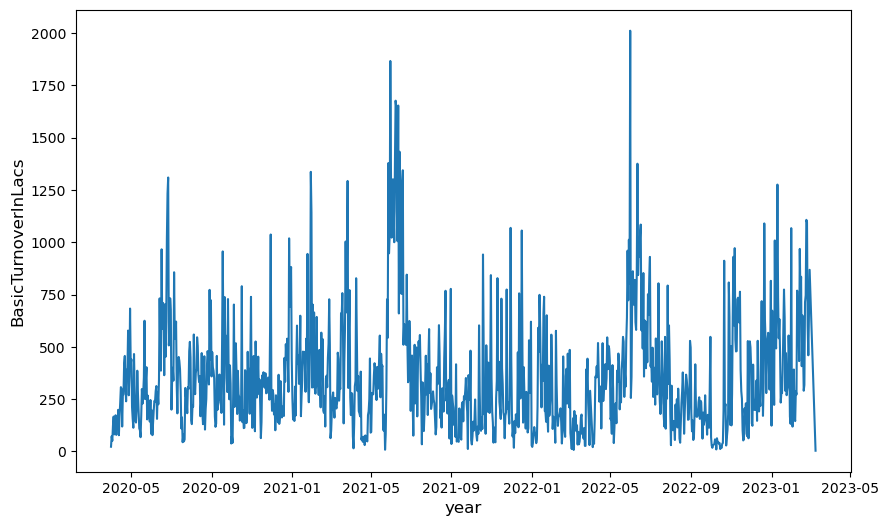

In [240]:
plt.figure(figsize=(10,6))
plt.xlabel('year', fontsize=12)
plt.ylabel('BasicTurnoverInLacs',fontsize=12)
plt.plot(upd_data['ds'],upd_data['y'])
plt.show()

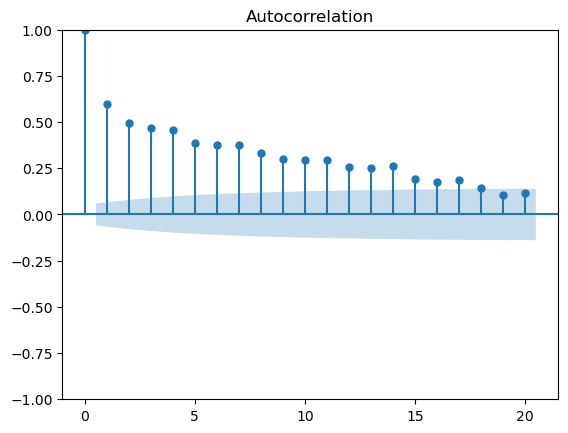

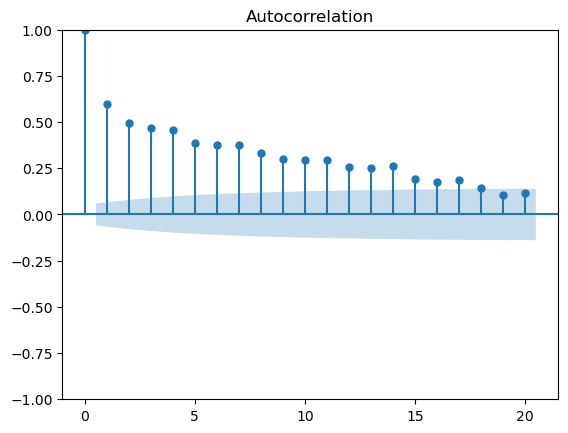

In [241]:
plot_acf(upd_data['y'],lags=20)

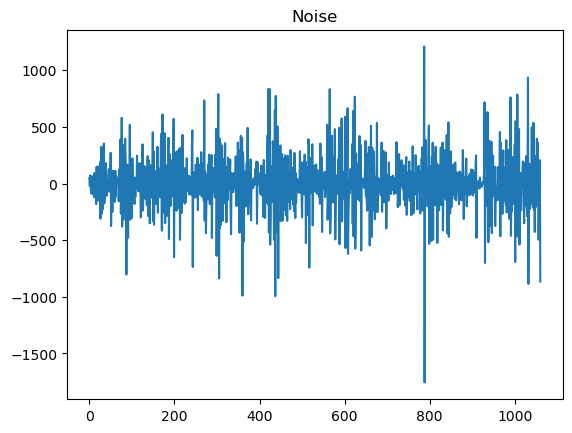

In [244]:
upd_diff = np.diff(upd_data['y'],n=1)
plt.title("Noise")
plt.plot(upd_diff)

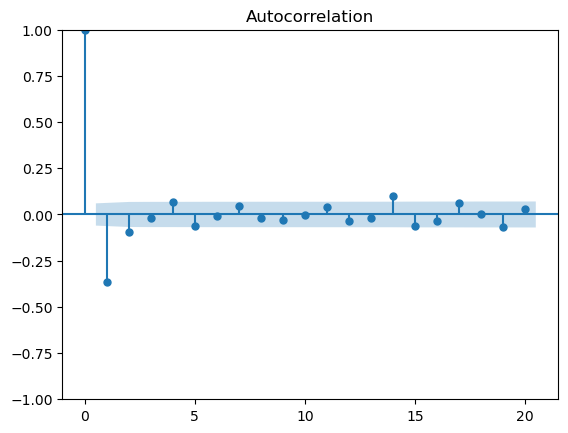

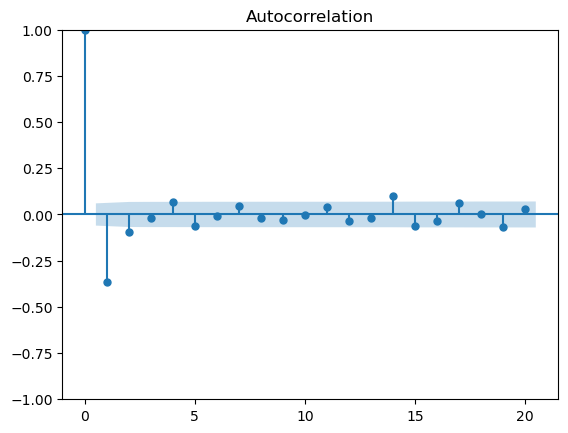

In [245]:
plot_acf(upd_diff,lags=20)

# Data Model

In [29]:
conda install neuralprophet

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::scrapy==2.8.0=py310hecd8cb5_0
  - defaults/osx-64::parsel==1.6.0=py310hecd8cb5_0
  - defaults/noarch::itemloaders==1.0.4=pyhd3eb1b0_1
done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



## Package Plan ##

  environment location: /Users/saifuddinshaikh/anaconda3

  added / updated specs:
    - neuralprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.05.30 |       hecd8cb5_0         121 KB
    certifi-2023.5.7           |  py310hecd8cb5_0         153 KB
 

In [90]:
conda install conda=23.5.0

Solving environment: done

## Package Plan ##

  environment location: /Users/saifuddinshaikh/anaconda3

  added / updated specs:
    - conda=23.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-23.5.0               |  py310hecd8cb5_0         1.0 MB
    packaging-23.0             |  py310hecd8cb5_0          71 KB
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following packages will be UPDATED:

  conda                              23.3.1-py310hecd8cb5_0 --> 23.5.0-py310hecd8cb5_0 
  packaging                            22.0-py310hecd8cb5_0 --> 23.0-py310hecd8cb5_0 



packaging-23.0       | 71 KB     |                                       |   0% 
packaging-23.0       | 71 KB     | ##################################### | 100% 
conda-23.5.0         | 1.0 MB    | #####                        

In [92]:
conda install neuralprophet[live]

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# Train Model using Prophet

In [162]:
m = NeuralProphet()

In [153]:
m.set_plotting_backend("plotly")

In [154]:
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)
df_train, df_test = m.split_df(upd_data, valid_p=0.2,freq='MS')

print("Dataset size:", len(upd_data))
print("Train dataset size:", len(df_train))
print("Validation dataset size:", len(df_test))

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.623% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


Dataset size: 1062
Train dataset size: 850
Validation dataset size: 212


In [155]:
metrics_train = m.fit(df=df_train, freq="MS")
metrics_test = m.test(df=df_test)
metrics_test

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.765% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 204
Epoch[204/204]: 100%|█| 204/204 [00:10<00:00, 18.80it/s, SmoothL1Loss=0.0267, MA
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.585% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss     MAE    RMSE
1         0.094 349.859 401.920


,SmoothL1Loss,MAE,RMSE
0,0.093539,349.858887,401.920105


In [ ]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    # Return the score
    return score
# Calculate the performance of this model
score = performance_metric(df_test['y'], )
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)
Model has a coefficient of determination, R^2, of 0.923.

In [164]:
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)
metrics = m.fit(df_train, validation_df=df_test)
metrics

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.765% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 204
Epoch[204/204]: 100%|█| 204/204 [00:12<00:00, 16.95it/s, SmoothL1Loss=0.0267, MA


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,2.333151,2593.808379,3180.934775,1.877753,0.0,3.508545,3704.105469,4446.192383
1,2.103820,2379.103428,2919.907229,1.694019,0.0,3.194487,3411.687500,4088.334717
2,1.860085,2149.427665,2627.043307,1.497511,0.0,2.850446,3089.330811,3691.204834
3,1.584915,1889.796249,2317.469860,1.276888,0.0,2.452765,2716.463135,3231.822021
4,1.272695,1589.386790,1949.521443,1.024954,0.0,1.973526,2263.726562,2677.305420
...,...,...,...,...,...,...,...,...
199,0.026710,160.631148,206.273990,0.019840,0.0,0.088287,339.912231,390.473206
200,0.026705,160.653075,209.194722,0.019834,0.0,0.088330,340.023773,390.568329
201,0.026699,160.528197,209.461438,0.019831,0.0,0.087959,339.274353,389.747528
202,0.026691,160.464833,208.004212,0.019824,0.0,0.087918,339.195801,389.655914


In [167]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [168]:
from livelossplot import PlotLosses

In [170]:
m = NeuralProphet(seasonality_mode="multiplicative", learning_rate=0.1)
metrics = m.fit(df=df_train, freq="MS", validation_df=df_test, progress="plot")

TypeError: NeuralProphet.fit() got an unexpected keyword argument 'epochs'

In [161]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 98.585% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [94]:
model = m.fit(upd_data, freq='D')

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.623% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 190


  0%|          | 0/126 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.56E-01, min: 1.58E+00


  0%|          | 0/126 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.56E-01, min: 1.58E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.34E-01
Epoch[190/190]: 100%|█| 190/190 [00:06<00:00, 28.07it/s, SmoothL1Loss=0.0295, MA


In [95]:
future = m.make_future_dataframe(upd_data, periods=900,n_historic_predictions=True)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.623% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.796% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.796% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,residual1,yhat1,trend,season_yearly,season_weekly
0,2020-04-01,22.36483,198.653099,221.017929,146.601440,51.067059,23.349432
1,2020-04-02,72.16297,108.084253,180.247223,146.566330,50.469379,-16.788483
2,2020-04-03,50.73437,191.145894,241.880264,146.531235,49.518055,45.830982
3,2020-04-04,123.79442,89.902937,213.697357,146.496109,48.215202,18.986031
4,2020-04-05,166.46900,-65.081167,101.387833,146.460999,46.566723,-91.639893


# Forecast Basic Turnover

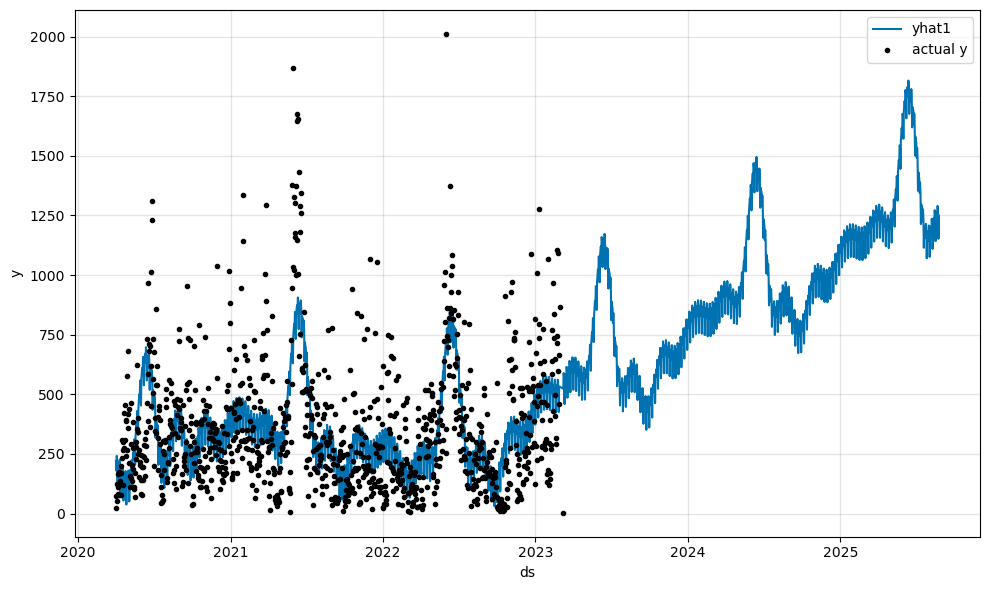

In [96]:
plot1 = m.plot(forecast)

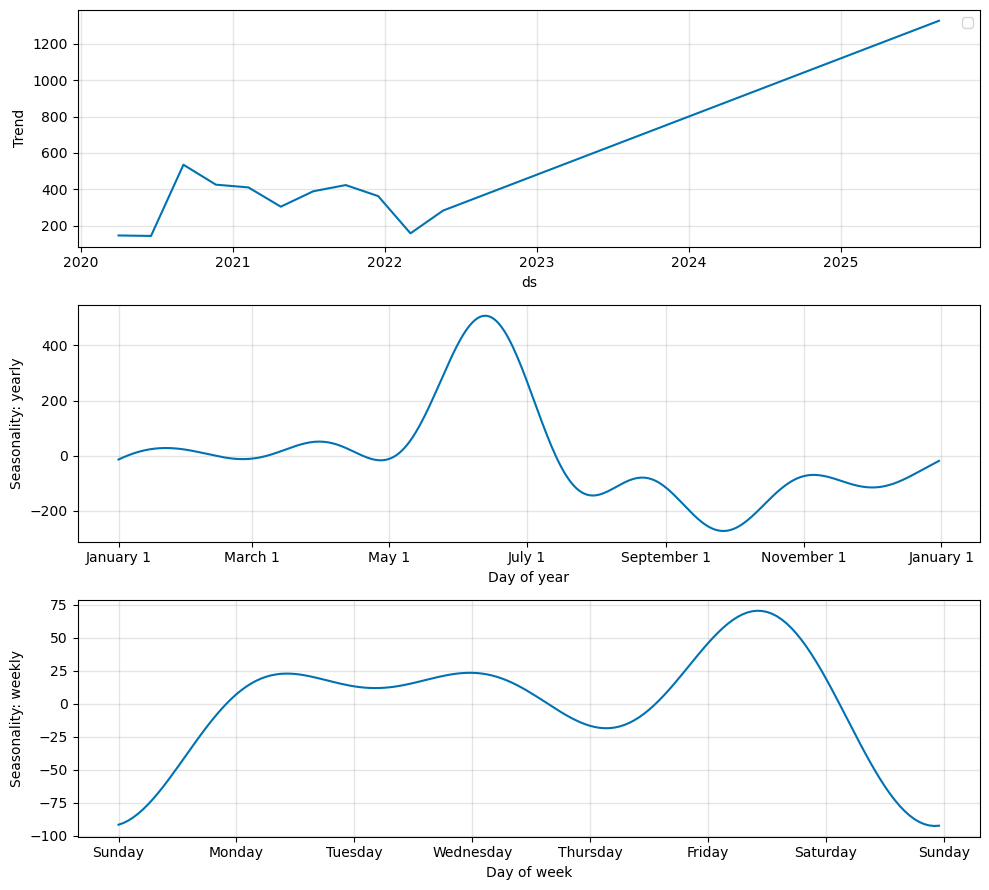

In [97]:
 plot2 = m.plot_components(forecast)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
cutoff_date = upd_data['ds'].min() + pd.DateOffset(years=2)

In [ ]:
# Split the data into training and testing sets
train_df = upd_data[upd_data['ds'] < cutoff_date]
test_df = upd_data[upd_data['ds'] >= cutoff_date]

In [208]:
train_df.shape

(730, 2)

In [209]:
train_df.tail(4)

,ds,y
726,2022-03-28,234.38334
727,2022-03-29,152.62760
728,2022-03-30,30.32810
729,2022-03-31,289.79598


In [210]:
test_df.head(4)

,ds,y
730,2022-04-03,99.33812
731,2022-04-04,20.35715
732,2022-04-05,62.71384
733,2022-04-06,36.31237


In [50]:
test_df.shape

(332, 2)

In [77]:
forecast['yhat1'].shape

(332,)

In [78]:
forecast['yhat1'].head(10)

0    246.071518
1    224.418976
2    122.545609
3    244.026352
4    231.516068
5    246.143677
6    202.839935
7    244.459839
8    222.807297
9    120.933929
Name: yhat1, dtype: float64

In [79]:
test_df['y'].shape

(332,)

In [72]:
test_df['y'].head(10)

730     99.33812
731     20.35715
732     62.71384
733     36.31237
734    151.93812
735    358.15712
736    353.05708
737    406.64278
738    355.08571
739    518.28560
Name: y, dtype: float64

In [73]:
def accuracy(obs, pred):
    """
    Calculate accuracy measures

    :param obs: pd.Series of observed values
    :param pred: pd.Series of forecasted values
    :return: dict with accuracy measures
    """

    obs, pred = np.array(obs.dropna()), np.array(pred.dropna())

    assert len(obs) == len(pred), f'accuracy(): obs len is {len(obs)} but preds len is {len(pred)}'

    rmse = np.sqrt(np.mean((obs - pred)**2))
    mape = np.mean(np.abs((obs - pred) / obs)) 

    return (rmse, mape)

In [74]:
# accuracy = m.score(test_df['y'],forecast['yhat1'])
# print(accuracy)
rmse, mape = accuracy(test_df['y'],forecast['yhat1'])
print(rmse)
print(mape)

354.86802374120055
0.9899227535165716


<Axes: xlabel='yhat1', ylabel='Density'>

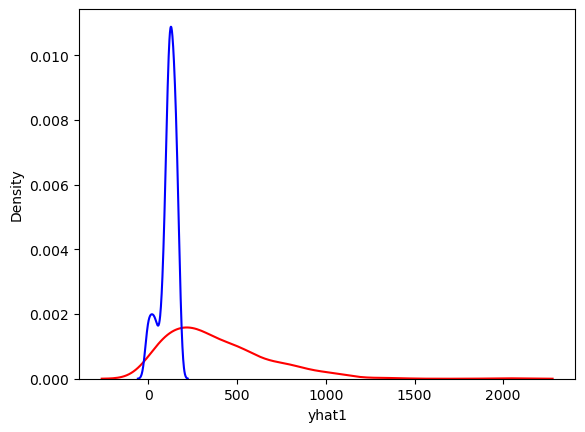

In [64]:
ax1 = sns.distplot(test_df['y'], hist=False, color="r", label="Actual Value")
sns.distplot(forecast['yhat1'], hist=False, color="b", label="Fitted Values" , ax=ax1)

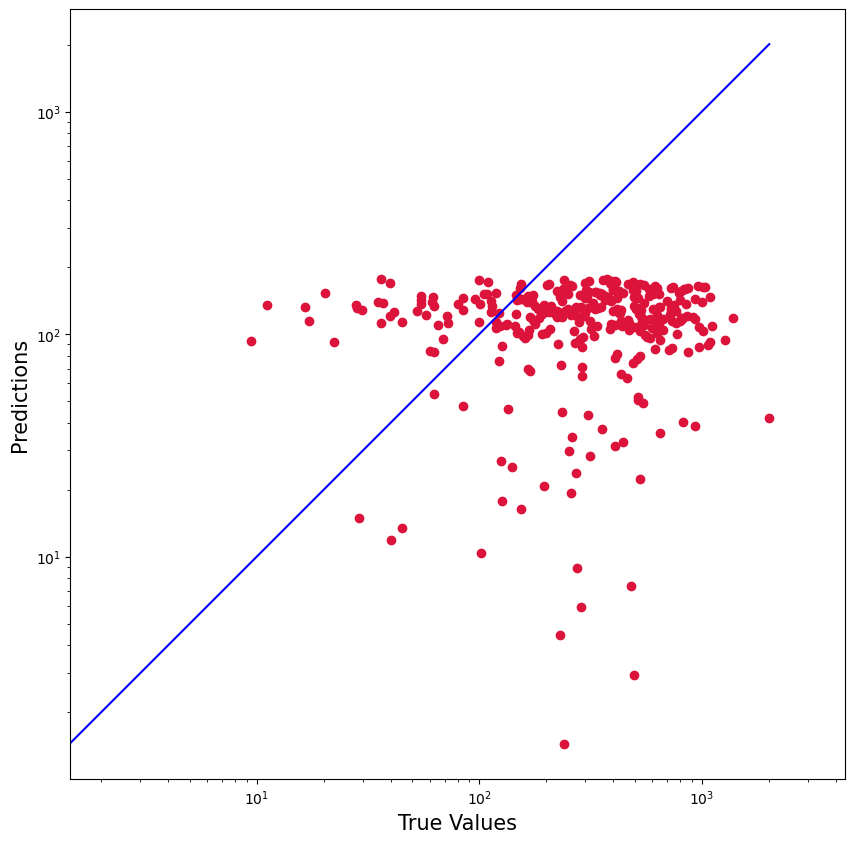

In [65]:
predicted_value = forecast['yhat1']
true_value = test_df['y']
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Calculate MAE and RMSE
mae = mean_absolute_error(test_df['y'], forecast['yhat1'].values)
rmse = mean_squared_error(test_df['y'], forecast['yhat1'].values, squared=False)

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 1127.5281672829426
RMSE: 1173.0472272239517


In [32]:
# Set the threshold or tolerance level
threshold = 0.05  # 5% tolerance

# Calculate the absolute percentage error
absolute_percentage_error = abs((test_df['y'] - forecast['yhat1'].values) / test_df['y'])

# Calculate the percentage accuracy
percentage_accuracy = 100 * (1 - absolute_percentage_error.mean())

print("Percentage Accuracy:", percentage_accuracy)

Percentage Accuracy: -949.0069084820454


In [171]:
pip install autots

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [224]:
from autots import AutoTS

In [230]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [232]:
conda install -c conda-forge prophet

Solving environment: done

## Package Plan ##

  environment location: /Users/saifuddinshaikh/anaconda3

  added / updated specs:
    - prophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.5.7   |       h8857fd0_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    clang-14.0.6               |       hecd8cb5_1         138 KB
    clang-14-14.0.6            |default_hd95374b_1         1.1 MB
    clang_osx-64-14.0.6        |       h3113cd8_6          20 KB  conda-forge
    clangxx-14.0.6             |default_hd95374b_1         138 KB
    clangxx_osx-64-14.0.6      |       h6f97653_6          19 KB  conda-forge
    cmdstan-2.31.0             |       h33b0451_0        43.6 MB
    cmdstanpy-1.1.0            |     pyhd8ed1ab_0          64 KB  conda-forge
    compiler-rt-14.0.6         |       hda8b6b8_0         

prophet-1.1.3        | 703 KB    | ##########1                           |  27% 


prophet-1.1.3        | 703 KB    | #############4                        |  36% 
libclang-cpp14-14.0. | 12.4 MB   | 5                                     |   2% 




clang-14-14.0.6      | 1.1 MB    | ###############5                      |  42% 





tbb-2021.9.0         | 155 KB    | ##################################### | 100% 





tbb-2021.9.0         | 155 KB    | ##################################### | 100% 









importlib_resources- | 30 KB     | ###################5                  |  53% 









importlib_resources- | 30 KB     | ##################################### | 100% 


prophet-1.1.3        | 703 KB    | #####################8                |  59% 




clang-14-14.0.6      | 1.1 MB    | ####################7                 |  56% 
libclang-cpp14-14.0. | 12.4 MB   | 9                                     |   3% 




clang-14-14.0.6      | 1.1 MB    | ##############################

compiler-rt_osx-64-1 | 3.4 MB    | ############################3         |  77% 

















llvm-tools-14.0.6    | 11.6 MB   | #######################1              |  62% 


















compiler-rt_osx-64-1 | 3.4 MB    | ################################2     |  87% 








cmdstan-2.31.0       | 43.6 MB   | #######6                              |  21% 

















llvm-tools-14.0.6    | 11.6 MB   | #########################             |  68% 








cmdstan-2.31.0       | 43.6 MB   | #######9                              |  21% 

















llvm-tools-14.0.6    | 11.6 MB   | ###########################           |  73% 








cmdstan-2.31.0       | 43.6 MB   | ########4                             |  23% 


















compiler-rt_osx-64-1 | 3.4 MB    | ##################################### | 100% 


















compiler-rt_osx-64-1 | 3.4 MB    | ##################################### | 100% 

















llvm-tools-14.0.6    | 11.6 MB   | #########

Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [234]:
from prophet import Prophet

In [235]:
model = AutoTS(forecast_length=100,frequency='D', model_list='best')
model.fit(train_df, date_col="ds", value_col="y")

Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7 in generation 0: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 10
Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model GLM in generation 0 of 10
Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLS in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model GluonTS in generation 0 of 10
T

03:41:20 - cmdstanpy - INFO - Chain [1] start processing
03:41:21 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 35 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue.') in model 35 in generation 0: GluonTS
Model Number: 36 with model MultivariateRegression in generation 0 of 10
Model Number: 37 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 37 in generation 0: MultivariateRegression
Model Number: 38 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 38 in generation 0: DatepartRegression
Model Number: 39 with model SeasonalNaive in generation 0 of 10
Model Number: 40 with model DatepartRegression in generation 0 of 10
Model Number: 41 with model UnobservedComponents in generation 0 of 10
Model Number: 42 with model UnobservedComponents in generation 0 of 10
Model

03:41:25 - cmdstanpy - INFO - Chain [1] start processing
03:41:25 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 53 with model FBProphet in generation 0 of 10
Model Number: 54 with model SeasonalNaive in generation 0 of 10
Model Number: 55 with model DatepartRegression in generation 0 of 10
Model Number: 56 with model NVAR in generation 0 of 10
Model Number: 57 with model Theta in generation 0 of 10
Model Number: 58 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 58 in generation 0: ARCH
Model Number: 59 with model LastValueNaive in generation 0 of 10
Model Number: 60 with model AverageValueNaive in generation 0 of 10
Model Number: 61 with model GLS in generation 0 of 10
Model Number: 62 with model GLM in generation 0 of 10
Model Number: 63 with model ETS in generation 0 of 10


03:41:26 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 64 with model FBProphet in generation 0 of 10


03:41:26 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 65 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue.') in model 65 in generation 0: GluonTS
Model Number: 66 with model SeasonalNaive in generation 0 of 10
Model Number: 67 with model UnobservedComponents in generation 0 of 10
Model Number: 68 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 68 in generation 0: VECM
Model Number: 69 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 69 in generation 0: MultivariateRegression
Model Number: 70 with model WindowRegression in generation 0 of 10
Model Number: 71 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 71 in generation 0: VAR
Model Number: 72 with model DatepartRegression in 

03:41:27 - cmdstanpy - INFO - Chain [1] start processing
03:41:27 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 84 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 84 in generation 0: VECM
Model Number: 85 with model FBProphet in generation 0 of 10
Model Number: 86 with model SeasonalNaive in generation 0 of 10
Model Number: 87 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 87 in generation 0: MultivariateRegression
Model Number: 88 with model LastValueNaive in generation 0 of 10
Model Number: 89 with model MultivariateMotif in generation 0 of 10
Model Number: 90 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 90 in generation 0: ARDL
Model Number: 91 with model FBProphet in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 91 in 

......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -668.294791
nSV = 629
[LibLinear].................................................................................................*.***.***.*
optimization finished, #iter = 1001
Objective value = -699.335523
nSV = 629
[LibLinear]..........................................................................................................................................*............
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -715.725273
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -752.520466
nSV = 629
[LibLinear][LibL

Model Number: 145 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 145 in generation 0: DatepartRegression
Model Number: 146 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 146 in generation 0: ARCH
Model Number: 147 with model ARCH in generation 0 of 10
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 147 in generation 0: ARCH
Model Number: 148 with model UnobservedComponents in generation 0 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 148 in generation 0: UnobservedComponents
Model Number: 149 with model FBProphet in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 149 in generation 0: FBProphet
Model Number: 150 with model

03:42:41 - cmdstanpy - INFO - Chain [1] start processing
03:42:41 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 193 with model ARDL in generation 1 of 10
Model Number: 194 with model UnivariateMotif in generation 1 of 10
Model Number: 195 with model NVAR in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 195 in generation 1: NVAR
Model Number: 196 with model SeasonalNaive in generation 1 of 10
Model Number: 197 with model ARDL in generation 1 of 10
Model Number: 198 with model GLM in generation 1 of 10
Model Number: 199 with model DatepartRegression in generation 1 of 10
Model Number: 200 with model Theta in generation 1 of 10
Model Number: 201 with model LastValueNaive in generation 1 of 10
Model Number: 202 with model ARDL in generation 1 of 10
Model Number: 203 with model MultivariateMotif in generation 1 of 10
Model Number: 204 with model DatepartRegression in generation 1 of 10
Model Number: 205 with model ETS in generation 1 of 10
Model Number: 206 with model MultivariateRegression in generation 1 of 10
Template Eval Error

03:42:43 - cmdstanpy - INFO - Chain [1] start processing
03:42:43 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 213 with model ETS in generation 1 of 10
Model Number: 214 with model ARDL in generation 1 of 10
Model Number: 215 with model Theta in generation 1 of 10
Model Number: 216 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 216 in generation 1: DatepartRegression

03:42:44 - cmdstanpy - INFO - Chain [1] start processing



Model Number: 217 with model WindowRegression in generation 1 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 217 in generation 1: WindowRegression
Model Number: 218 with model FBProphet in generation 1 of 10


03:42:44 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 219 with model MultivariateMotif in generation 1 of 10
Model Number: 220 with model WindowRegression in generation 1 of 10
Model Number: 221 with model SectionalMotif in generation 1 of 10
Model Number: 222 with model WindowRegression in generation 1 of 10
Model Number: 223 with model GLM in generation 1 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 223 in generation 1: GLM
Model Number: 224 with model AverageValueNaive in generation 1 of 10
Model Number: 225 with model LastValueNaive in generation 1 of 10
Model Number: 226 with model UnivariateMotif in generation 1 of 10


03:42:45 - cmdstanpy - INFO - Chain [1] start processing
03:42:45 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 227 with model FBProphet in generation 1 of 10
Model Number: 228 with model SeasonalityMotif in generation 1 of 10
Model Number: 229 with model SeasonalityMotif in generation 1 of 10
Model Number: 230 with model WindowRegression in generation 1 of 10
Model Number: 231 with model LastValueNaive in generation 1 of 10
Model Number: 232 with model UnivariateMotif in generation 1 of 10
Model Number: 233 with model LastValueNaive in generation 1 of 10
Model Number: 234 with model SectionalMotif in generation 1 of 10
Model Number: 235 with model UnivariateMotif in generation 1 of 10
Model Number: 236 with model UnivariateMotif in generation 1 of 10
Model Number: 237 with model ARDL in generation 1 of 10
Model Number: 238 with model GLS in generation 1 of 10
Model Number: 239 with model DatepartRegression in generation 1 of 10
Model Number: 240 with model DatepartRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passe

03:44:00 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 258 with model FBProphet in generation 1 of 10


03:44:00 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 259 with model UnivariateMotif in generation 1 of 10
Model Number: 260 with model MultivariateMotif in generation 1 of 10
Model Number: 261 with model UnobservedComponents in generation 1 of 10


03:44:01 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 262 with model FBProphet in generation 1 of 10


03:44:01 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 263 with model LastValueNaive in generation 1 of 10
Model Number: 264 with model SeasonalNaive in generation 1 of 10
Model Number: 265 with model SectionalMotif in generation 1 of 10
Model Number: 266 with model ARDL in generation 1 of 10
Model Number: 267 with model NVAR in generation 1 of 10
Model Number: 268 with model UnivariateMotif in generation 1 of 10
Model Number: 269 with model MultivariateMotif in generation 1 of 10
Model Number: 270 with model MultivariateMotif in generation 1 of 10
Model Number: 271 with model ARDL in generation 1 of 10
Model Number: 272 with model SeasonalNaive in generation 1 of 10
Model Number: 273 with model MultivariateMotif in generation 1 of 10
Model Number: 274 with model DatepartRegression in generation 1 of 10
Model Number: 275 with model MultivariateMotif in generation 1 of 10
Model Number: 276 with model AverageValueNaive in generation 1 of 10
Model Number: 277 with model AverageValueNaive in generation 1 of 10
Model Number: 278 w

03:44:04 - cmdstanpy - INFO - Chain [1] start processing
03:44:04 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 281 with model AverageValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 281 in generation 2: AverageValueNaive
Model Number: 282 with model FBProphet in generation 2 of 10
Model Number: 283 with model Theta in generation 2 of 10
Model Number: 284 with model DatepartRegression in generation 2 of 10
Model Number: 285 with model LastValueNaive in generation 2 of 10
Model Number: 286 with model ARDL in generation 2 of 10
Model Number: 287 with model GLM in generation 2 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 287 in generation 2: GLM
Model Number: 288 with model UnobservedComponents in generation 2 of 10
Template Eval Error: LinAlgError('Schur decomposition solver error.') in model 288 in generation 2: UnobservedComponents
Model Number: 289 with model GLM in generation 2 of 10
Model Number: 290 wi

03:44:05 - cmdstanpy - INFO - Chain [1] start processing
03:44:05 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 292 with model FBProphet in generation 2 of 10
Model Number: 293 with model MultivariateMotif in generation 2 of 10


03:44:05 - cmdstanpy - INFO - Chain [1] start processing
03:44:05 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 294 with model FBProphet in generation 2 of 10
Model Number: 295 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 295 in generation 2: MultivariateRegression
Model Number: 296 with model MultivariateMotif in generation 2 of 10
Model Number: 297 with model UnobservedComponents in generation 2 of 10
Model Number: 298 with model WindowRegression in generation 2 of 10
Model Number: 299 with model ETS in generation 2 of 10
Model Number: 300 with model AverageValueNaive in generation 2 of 10
Model Number: 301 with model ARDL in generation 2 of 10
Template Eval Error: ValueError("ARDL series y failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             day  weekend      epoch  month_1  month_2  month_3  month_4  \\\nds                                                                        \n2020-04-01    1        0  245894

Model Number: 311 with model FBProphet in generation 2 of 10


03:44:08 - cmdstanpy - INFO - Chain [1] start processing
03:44:08 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 312 with model NVAR in generation 2 of 10
Model Number: 313 with model ARDL in generation 2 of 10
Model Number: 314 with model DatepartRegression in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 314 in generation 2: DatepartRegression
Model Number: 315 with model UnobservedComponents in generation 2 of 10
Model Number: 316 with model DatepartRegression in generation 2 of 10
Model Number: 317 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 317 in generation 2: DatepartRegression
Model Number: 318 with model UnobservedComponents in generation 2 of 10
Model Number: 319 with model SeasonalityMotif in generation 2 of 10
Model Number: 320 with model LastValueNaive in generation 2 of 10
Model Number: 321 with model WindowRegression in generation 2 of 10
Model Number: 322 with model FBProphet in generation 2 of 10


03:44:08 - cmdstanpy - INFO - Chain [1] start processing
03:44:08 - cmdstanpy - INFO - Chain [1] done processing


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 322 in generation 2: FBProphet
Model Number: 323 with model MultivariateRegression in generation 2 of 10
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.004279
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.005584
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.007309
nSV = 629
[LibLinear]....

[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.028728
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.027643
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.027803
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 

......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.030993
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.031651
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.029090
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be f

[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.031955
nSV = 629
[LibLinear]...........................................................................................................................[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]...........................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.030886
nSV = 629
......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.031610
nSV = 629
......................................................................................................................................................
optimization 

[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.034278
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.031223
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.031379
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 

[LibLinear]..............................................................................................................................................[LibLinear][LibLinear]........
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.033947
nSV = 629
......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.033893
nSV = 629
......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.034709
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 

[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.036721
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.036689
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.033415
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 

[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.035658
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.035387
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.034941
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 

[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.035955
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.036580
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.036402
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 

[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.035295
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.034517
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.034049
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 

[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.034836
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.034545
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.035253
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 

[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.035907
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.035888
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.034305
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 

[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.037264
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.036160
nSV = 629
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.037060
nSV = 629
.............................................................................................................

......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.036828
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.037259
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.035850
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be f

......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.037538
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.038009
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.035347
nSV = 629
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be f

03:44:33 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 332 with model FBProphet in generation 2 of 10


03:44:33 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 333 with model GLM in generation 2 of 10
Model Number: 334 with model MultivariateMotif in generation 2 of 10
Model Number: 335 with model SeasonalNaive in generation 2 of 10
Model Number: 336 with model SeasonalNaive in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 336 in generation 2: SeasonalNaive
Model Number: 337 with model MultivariateMotif in generation 2 of 10
Model Number: 338 with model GLS in generation 2 of 10
Model Number: 339 with model NVAR in generation 2 of 10
Model Number: 340 with model UnivariateMotif in generation 2 of 10
Model Number: 341 with model LastValueNaive in generation 2 of 10
Model Number: 342 with model UnivariateMotif in generation 2 of 10
Model Number: 343 with model MultivariateMotif in generation 2 of 10
Model Number: 344 with model ARDL in generation 2 of 10
Model Number: 345 with model SeasonalNaive in generation 2 of 10
Model Number: 346 with model DatepartRegression in generat

03:44:35 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 359 with model FBProphet in generation 2 of 10


03:44:35 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 360 with model ETS in generation 2 of 10
Model Number: 361 with model AverageValueNaive in generation 2 of 10


03:44:35 - cmdstanpy - INFO - Chain [1] start processing
03:44:35 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 362 with model FBProphet in generation 2 of 10
Model Number: 363 with model ARDL in generation 2 of 10
Model Number: 364 with model DatepartRegression in generation 2 of 10
Model Number: 365 with model DatepartRegression in generation 2 of 10
Model Number: 366 with model SeasonalityMotif in generation 2 of 10
Model Number: 367 with model LastValueNaive in generation 2 of 10
Model Number: 368 with model MultivariateMotif in generation 2 of 10
Model Number: 369 with model FBProphet in generation 2 of 10


03:44:40 - cmdstanpy - INFO - Chain [1] start processing
03:44:40 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 370 with model DatepartRegression in generation 2 of 10
Model Number: 371 with model ETS in generation 2 of 10
Model Number: 372 with model GLM in generation 2 of 10
Model Number: 373 with model LastValueNaive in generation 2 of 10
Model Number: 374 with model UnivariateMotif in generation 2 of 10
Model Number: 375 with model SeasonalityMotif in generation 2 of 10
Model Number: 376 with model UnivariateMotif in generation 2 of 10
Model Number: 377 with model MultivariateMotif in generation 2 of 10
Model Number: 378 with model MultivariateMotif in generation 2 of 10
Model Number: 379 with model SeasonalityMotif in generation 2 of 10
Model Number: 380 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("Some value(s) of y are out of the valid range of the loss 'HalfPoissonLoss'.") in model 380 in generation 2: WindowRegression
Model Number: 381 with model SectionalMotif in generation 2 of 10
Model Number: 382 with model FBProphet in generation 

03:44:42 - cmdstanpy - INFO - Chain [1] start processing
03:44:42 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 390 with model FBProphet in generation 3 of 10
Model Number: 391 with model UnobservedComponents in generation 3 of 10
Model Number: 392 with model MultivariateMotif in generation 3 of 10
Model Number: 393 with model WindowRegression in generation 3 of 10
Model Number: 394 with model Theta in generation 3 of 10


03:44:42 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 395 with model FBProphet in generation 3 of 10


03:44:43 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 396 with model ARDL in generation 3 of 10
Model Number: 397 with model DatepartRegression in generation 3 of 10


03:44:43 - cmdstanpy - INFO - Chain [1] start processing
03:44:43 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 398 with model FBProphet in generation 3 of 10
Model Number: 399 with model AverageValueNaive in generation 3 of 10
Model Number: 400 with model SeasonalNaive in generation 3 of 10
Model Number: 401 with model MultivariateMotif in generation 3 of 10
Model Number: 402 with model LastValueNaive in generation 3 of 10
Model Number: 403 with model DatepartRegression in generation 3 of 10
Model Number: 404 with model AverageValueNaive in generation 3 of 10
Model Number: 405 with model SeasonalNaive in generation 3 of 10
Model Number: 406 with model SectionalMotif in generation 3 of 10
Model Number: 407 with model SeasonalityMotif in generation 3 of 10
Model Number: 408 with model SeasonalNaive in generation 3 of 10


03:44:51 - cmdstanpy - INFO - Chain [1] start processing
03:44:51 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 409 with model FBProphet in generation 3 of 10
Model Number: 410 with model FBProphet in generation 3 of 10


03:44:51 - cmdstanpy - INFO - Chain [1] start processing
03:44:51 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 411 with model ARDL in generation 3 of 10
Model Number: 412 with model MultivariateMotif in generation 3 of 10
Model Number: 413 with model FBProphet in generation 3 of 10


03:44:51 - cmdstanpy - INFO - Chain [1] start processing
03:44:52 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 414 with model GLS in generation 3 of 10
Model Number: 415 with model SeasonalityMotif in generation 3 of 10
Model Number: 416 with model SeasonalityMotif in generation 3 of 10
Model Number: 417 with model UnivariateMotif in generation 3 of 10
Model Number: 418 with model NVAR in generation 3 of 10
Model Number: 419 with model GLS in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 419 in generation 3: GLS
Model Number: 420 with model GLS in generation 3 of 10
Model Number: 421 with model ETS in generation 3 of 10
Model Number: 422 with model FBProphet in generation 3 of 10


03:44:52 - cmdstanpy - INFO - Chain [1] start processing
03:44:52 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 423 with model UnivariateMotif in generation 3 of 10
Model Number: 424 with model WindowRegression in generation 3 of 10
Model Number: 425 with model WindowRegression in generation 3 of 10
Model Number: 426 with model ETS in generation 3 of 10
Model Number: 427 with model SeasonalNaive in generation 3 of 10
Model Number: 428 with model GLS in generation 3 of 10
Model Number: 429 with model ARDL in generation 3 of 10
Model Number: 430 with model Theta in generation 3 of 10
Model Number: 431 with model LastValueNaive in generation 3 of 10


03:44:54 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 432 with model FBProphet in generation 3 of 10


03:44:54 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 433 with model UnivariateMotif in generation 3 of 10
Model Number: 434 with model WindowRegression in generation 3 of 10
Model Number: 435 with model SeasonalNaive in generation 3 of 10
Model Number: 436 with model DatepartRegression in generation 3 of 10
Model Number: 437 with model SeasonalityMotif in generation 3 of 10
Model Number: 438 with model SeasonalityMotif in generation 3 of 10
Model Number: 439 with model ARDL in generation 3 of 10
Model Number: 440 with model LastValueNaive in generation 3 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 440 in generation 3: LastValueNaive
Model Number: 441 with model SeasonalNaive in generation 3 of 10
Model Number: 442 with model SeasonalityMotif in generation 3 of 10
Model Number: 443 with model SeasonalityMotif in generation 3 of 10
Model Number: 444 with model WindowRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in m

03:45:05 - cmdstanpy - INFO - Chain [1] start processing
03:45:05 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 465 with model SeasonalNaive in generation 3 of 10
Model Number: 466 with model AverageValueNaive in generation 3 of 10
Model Number: 467 with model SectionalMotif in generation 3 of 10
Model Number: 468 with model MultivariateRegression in generation 3 of 10
Model Number: 469 with model SeasonalityMotif in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 469 in generation 3: SeasonalityMotif
Model Number: 470 with model MultivariateRegression in generation 3 of 10
Model Number: 471 with model SeasonalNaive in generation 3 of 10
Model Number: 472 with model MultivariateRegression in generation 3 of 10
Model Number: 473 with model UnobservedComponents in generation 3 of 10
Model Number: 474 with model MultivariateMotif in generation 3 of 10
Model Number: 475 with model SectionalMotif in generation 3 of 10
Model Number: 476 with model DatepartRegression in generation 3 of 10


03:45:12 - cmdstanpy - INFO - Chain [1] start processing
03:45:12 - cmdstanpy - INFO - Chain [1] done processing


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 476 in generation 3: DatepartRegression
Model Number: 477 with model FBProphet in generation 3 of 10
Model Number: 478 with model UnobservedComponents in generation 3 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 478 in generation 3: UnobservedComponents
Model Number: 479 with model UnivariateMotif in generation 3 of 10
Model Number: 480 with model MultivariateMotif in generation 3 of 10
Model Number: 481 with model ARDL in generation 3 of 10
Model Number: 482 with model SeasonalityMotif in generation 3 of 10
Model Number: 483 with model LastValueNaive in generation 3 of 10
Model Number: 484 with model AverageValueNaive in generation 3 of 10
Model Number: 485 with model LastValueNaive in generation 3 of 10
Model Number: 486 with model AverageValueNaive in generation 3 of 10
Model Number: 487 with model MultivariateMotif in generation 3 of 10
Model Number: 4

03:45:14 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 491 with model FBProphet in generation 3 of 10


03:45:15 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 492 with model DatepartRegression in generation 3 of 10
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.004516
nSV = 630
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.004851
nSV = 630
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.004371
nSV = 630
[LibLinear]...............................................................................................................................

03:45:15 - cmdstanpy - INFO - Chain [1] start processing
03:45:15 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 494 with model FBProphet in generation 3 of 10
Model Number: 495 with model AverageValueNaive in generation 3 of 10
Model Number: 496 with model UnivariateMotif in generation 3 of 10
Model Number: 497 with model MultivariateMotif in generation 3 of 10
Model Number: 498 with model SectionalMotif in generation 3 of 10
New Generation: 4 of 10
Model Number: 499 with model UnobservedComponents in generation 4 of 10
Model Number: 500 with model SeasonalNaive in generation 4 of 10
Model Number: 501 with model MultivariateRegression in generation 4 of 10
Model Number: 502 with model MultivariateMotif in generation 4 of 10
Model Number: 503 with model AverageValueNaive in generation 4 of 10
Model Number: 504 with model UnivariateMotif in generation 4 of 10
Model Number: 505 with model MultivariateMotif in generation 4 of 10
Model Number: 506 with model UnobservedComponents in generation 4 of 10
Model Number: 507 with model SeasonalNaive in generation 4 of 10
Template Eval Error: E

03:45:20 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 529 with model FBProphet in generation 4 of 10


03:45:20 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 530 with model FBProphet in generation 4 of 10


03:45:21 - cmdstanpy - INFO - Chain [1] start processing
03:45:21 - cmdstanpy - INFO - Chain [1] done processing
03:45:21 - cmdstanpy - INFO - Chain [1] start processing
03:45:21 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 531 with model FBProphet in generation 4 of 10
Model Number: 532 with model WindowRegression in generation 4 of 10
Model Number: 533 with model SeasonalNaive in generation 4 of 10
Model Number: 534 with model SeasonalNaive in generation 4 of 10
Model Number: 535 with model AverageValueNaive in generation 4 of 10
Model Number: 536 with model SectionalMotif in generation 4 of 10
Model Number: 537 with model ARDL in generation 4 of 10
Model Number: 538 with model FBProphet in generation 4 of 10


03:45:21 - cmdstanpy - INFO - Chain [1] start processing
03:45:21 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 539 with model SectionalMotif in generation 4 of 10
Model Number: 540 with model UnobservedComponents in generation 4 of 10
Model Number: 541 with model DatepartRegression in generation 4 of 10
Model Number: 542 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 542 in generation 4: GLM
Model Number: 543 with model LastValueNaive in generation 4 of 10
Model Number: 544 with model MultivariateMotif in generation 4 of 10
Model Number: 545 with model AverageValueNaive in generation 4 of 10
Model Number: 546 with model Theta in generation 4 of 10
Model Number: 547 with model UnobservedComponents in generation 4 of 10
Model Number: 548 with model MultivariateMotif in generation 4 of 10
Model Number: 549 with model Theta in generation 4 of 10
Model Number: 550 with model SeasonalityMotif in generation 4 of 10
Model Number: 551 with mo

03:45:26 - cmdstanpy - INFO - Chain [1] start processing
03:45:26 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 552 with model FBProphet in generation 4 of 10
Model Number: 553 with model WindowRegression in generation 4 of 10
Model Number: 554 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 554 in generation 4: GLM
Model Number: 555 with model WindowRegression in generation 4 of 10
Model Number: 556 with model ETS in generation 4 of 10
Model Number: 557 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 557 in generation 4: DatepartRegression
Model Number: 558 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'AlignLastValue', '1': 'Log', '2': 'CumSumTransformer'}, 'transformation_params': {'0': {'rows': 1, 'lag'

03:45:27 - cmdstanpy - INFO - Chain [1] start processing
03:45:27 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 563 with model GLM in generation 4 of 10


03:45:27 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 564 with model FBProphet in generation 4 of 10


03:45:27 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 565 with model UnivariateMotif in generation 4 of 10
Model Number: 566 with model AverageValueNaive in generation 4 of 10
Model Number: 567 with model SectionalMotif in generation 4 of 10
Model Number: 568 with model SeasonalityMotif in generation 4 of 10
Model Number: 569 with model SectionalMotif in generation 4 of 10
Model Number: 570 with model SeasonalNaive in generation 4 of 10
Model Number: 571 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 571 in generation 4: DatepartRegression
Model Number: 572 with model LastValueNaive in generation 4 of 10
Model Number: 573 with model AverageValueNaive in generation 4 of 10
Model Number: 574 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 574 in generation 4: DatepartRegression
Model Number: 575 with model FBProphet in genera

03:45:28 - cmdstanpy - INFO - Chain [1] start processing
03:45:28 - cmdstanpy - INFO - Chain [1] done processing


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 575 in generation 4: FBProphet
Model Number: 576 with model SeasonalityMotif in generation 4 of 10
Model Number: 577 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 577 in generation 4: DatepartRegression
Model Number: 578 with model AverageValueNaive in generation 4 of 10
Model Number: 579 with model WindowRegression in generation 4 of 10
Model Number: 580 with model WindowRegression in generation 4 of 10
Model Number: 581 with model LastValueNaive in generation 4 of 10
Model Number: 582 with model MultivariateMotif in generation 4 of 10
Model Number: 583 with model AverageValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 583 in generation 4: AverageValueNaive
Model Number: 584 with model Season

03:45:34 - cmdstanpy - INFO - Chain [1] start processing
03:45:34 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 598 with model DatepartRegression in generation 4 of 10
Model Number: 599 with model UnivariateMotif in generation 4 of 10
Model Number: 600 with model UnivariateMotif in generation 4 of 10
Model Number: 601 with model SeasonalityMotif in generation 4 of 10
Model Number: 602 with model GLS in generation 4 of 10
Model Number: 603 with model ETS in generation 4 of 10
Model Number: 604 with model SeasonalityMotif in generation 4 of 10
Model Number: 605 with model NVAR in generation 4 of 10
Model Number: 606 with model SeasonalityMotif in generation 4 of 10
Model Number: 607 with model UnivariateMotif in generation 4 of 10
Model Number: 608 with model WindowRegression in generation 4 of 10
New Generation: 5 of 10
Model Number: 609 with model AverageValueNaive in generation 5 of 10
Model Number: 610 with model GLS in generation 5 of 10
Model Number: 611 with model MultivariateMotif in generation 5 of 10
Model Number: 612 with model MultivariateRegression in generation 5 of 10


03:45:39 - cmdstanpy - INFO - Chain [1] start processing
03:45:39 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 630 with model WindowRegression in generation 5 of 10


/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.

/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.

Model Number: 631 with model WindowRegression in generation 5 of 10


03:45:56 - cmdstanpy - INFO - Chain [1] start processing
03:45:56 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 632 with model FBProphet in generation 5 of 10
Model Number: 633 with model DatepartRegression in generation 5 of 10
Model Number: 634 with model AverageValueNaive in generation 5 of 10
Model Number: 635 with model LastValueNaive in generation 5 of 10
Model Number: 636 with model LastValueNaive in generation 5 of 10
Model Number: 637 with model WindowRegression in generation 5 of 10
Model Number: 638 with model SectionalMotif in generation 5 of 10
Model Number: 639 with model FBProphet in generation 5 of 10


03:45:57 - cmdstanpy - INFO - Chain [1] start processing
03:45:57 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 640 with model AverageValueNaive in generation 5 of 10
Model Number: 641 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'mean', 'transformations': {'0': 'Log', '1': 'CumSumTransformer'}, 'transformation_params': {'0': {}, '1': {}}}. fail_on_forecast_nan=True") in model 641 in generation 5: UnobservedComponents
Model Number: 642 with model WindowRegression in generation 5 of 10
Model Number: 643 with model SeasonalNaive in generation 5 of 10
Model Number: 644 with model Theta in generation 5 of 10
Model Number: 645 with model SeasonalityMotif in generation 5 of 10
Model Number: 646 with model SeasonalityMotif in generation 5 of 10
Model Number: 647 with model DatepartRegression in generation 5 of 10
Model Number: 648 with model UnobservedComponents in generation 5 of 10
Model Number: 649 with model SeasonalNaive in generation 5 of 10
Model Number: 650 with model LastVal

03:45:59 - cmdstanpy - INFO - Chain [1] start processing
03:45:59 - cmdstanpy - INFO - Chain [1] done processing



Model Number: 657 with model DatepartRegression in generation 5 of 10
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.004463
nSV = 630
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.004695
nSV = 630
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.004387
nSV = 630
Model Number: 658 with model SeasonalNaive in generation 5 of 10
Model Number: 659 with model UnivariateMotif in generation 5 of 10
Model

03:46:00 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 671 with model FBProphet in generation 5 of 10


03:46:00 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 672 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 672 in generation 5: ARDL
Model Number: 673 with model ARDL in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 673 in generation 5: ARDL
Model Number: 674 with model UnivariateMotif in generation 5 of 10
Model Number: 675 with model SeasonalityMotif in generation 5 of 10
Model Number: 676 with model UnivariateMotif in generation 5 of 10
Model Number: 677 with model MultivariateRegression in generation 5 of 10
Model Number: 678 with model LastValueNaive in generation 5 of 10
Model Number: 679 with model WindowRegression in generation 5 of 10
Model Number: 680 with model MultivariateMotif in generation 5 of 10
Model Number: 681 with model GLM in generation 5 of 10
Model Number: 682 with model LastValueNaive in generation 5 of 10
Template Eval Error: Exception('Tr

03:46:02 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 688 with model FBProphet in generation 5 of 10


03:46:03 - cmdstanpy - INFO - Chain [1] done processing
03:46:03 - cmdstanpy - INFO - Chain [1] start processing
03:46:03 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 689 with model FBProphet in generation 5 of 10
Model Number: 690 with model SectionalMotif in generation 5 of 10
Model Number: 691 with model SeasonalityMotif in generation 5 of 10
Model Number: 692 with model LastValueNaive in generation 5 of 10
Model Number: 693 with model NVAR in generation 5 of 10
Model Number: 694 with model SeasonalityMotif in generation 5 of 10
Model Number: 695 with model SectionalMotif in generation 5 of 10
Model Number: 696 with model WindowRegression in generation 5 of 10
New Generation: 6 of 10


03:46:03 - cmdstanpy - INFO - Chain [1] start processing
03:46:03 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 697 with model FBProphet in generation 6 of 10
Model Number: 698 with model LastValueNaive in generation 6 of 10
Model Number: 699 with model GLS in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 699 in generation 6: GLS
Model Number: 700 with model Theta in generation 6 of 10
Model Number: 701 with model WindowRegression in generation 6 of 10


03:46:04 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 702 with model FBProphet in generation 6 of 10


03:46:04 - cmdstanpy - INFO - Chain [1] done processing
03:46:04 - cmdstanpy - INFO - Chain [1] start processing
03:46:04 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 703 with model FBProphet in generation 6 of 10
Model Number: 704 with model AverageValueNaive in generation 6 of 10
Model Number: 705 with model FBProphet in generation 6 of 10


03:46:04 - cmdstanpy - INFO - Chain [1] start processing
03:46:05 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 706 with model MultivariateMotif in generation 6 of 10
Model Number: 707 with model SectionalMotif in generation 6 of 10
Model Number: 708 with model MultivariateMotif in generation 6 of 10
Model Number: 709 with model UnobservedComponents in generation 6 of 10
Model Number: 710 with model MultivariateMotif in generation 6 of 10
Model Number: 711 with model UnivariateMotif in generation 6 of 10
Model Number: 712 with model WindowRegression in generation 6 of 10
Model Number: 713 with model AverageValueNaive in generation 6 of 10
Model Number: 714 with model LastValueNaive in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 714 in generation 6: LastValueNaive
Model Number: 715 with model ETS in generation 6 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on y with ValueError('Can only dampen the trend component')
Model Number: 716 with model SeasonalityMotif in generation 6 of 10
Model Number

/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.

03:46:08 - cmdstanpy - INFO - Chain [1] start processing
03:46:08 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 720 with model FBProphet in generation 6 of 10
Model Number: 721 with model UnivariateMotif in generation 6 of 10
Model Number: 722 with model GLM in generation 6 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 722 in generation 6: GLM
Model Number: 723 with model AverageValueNaive in generation 6 of 10
Model Number: 724 with model UnobservedComponents in generation 6 of 10


03:46:08 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 725 with model FBProphet in generation 6 of 10


03:46:08 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 726 with model WindowRegression in generation 6 of 10
Model Number: 727 with model SectionalMotif in generation 6 of 10
Model Number: 728 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError('Input X contains NaN.\nRadiusNeighborsRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 728 in generation 6: WindowRegression
Model Number: 729 with model MultivariateMotif in generation 6 of 10

03:46:09 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 735 with model FBProphet in generation 6 of 10


03:46:09 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 736 with model UnobservedComponents in generation 6 of 10
Model Number: 737 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 737 in generation 6: DatepartRegression
Model Number: 738 with model MultivariateMotif in generation 6 of 10
Model Number: 739 with model WindowRegression in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 739 in generation 6: WindowRegression
Model Number: 740 with model UnobservedComponents in generation 6 of 10
Model Number: 741 with model DatepartRegression in generation 6 of 10
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = 0.000000
nSV = 0
[LibLinear].................

[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = 0.000000
nSV = 0
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = 0.000000
nSV = 0
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = 0.000000
nSV = 0
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be

03:46:12 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 745 with model FBProphet in generation 6 of 10


03:46:12 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 746 with model NVAR in generation 6 of 10
Model Number: 747 with model SectionalMotif in generation 6 of 10
Model Number: 748 with model SeasonalityMotif in generation 6 of 10
Model Number: 749 with model WindowRegression in generation 6 of 10
Model Number: 750 with model NVAR in generation 6 of 10
Model Number: 751 with model SeasonalNaive in generation 6 of 10
Model Number: 752 with model SeasonalityMotif in generation 6 of 10
Model Number: 753 with model GLS in generation 6 of 10
Model Number: 754 with model AverageValueNaive in generation 6 of 10
Model Number: 755 with model DatepartRegression in generation 6 of 10
Model Number: 756 with model ETS in generation 6 of 10
Model Number: 757 with model GLM in generation 6 of 10
Model Number: 758 with model SeasonalityMotif in generation 6 of 10
Model Number: 759 with model SeasonalNaive in generation 6 of 10
Model Number: 760 with model SeasonalityMotif in generation 6 of 10
Model Number: 761 with model FBProphet in genera

03:46:14 - cmdstanpy - INFO - Chain [1] start processing
03:46:14 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 764 with model UnobservedComponents in generation 6 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 764 in generation 6: UnobservedComponents
Model Number: 765 with model FBProphet in generation 6 of 10
Model Number: 766 with model FBProphet in generation 6 of 10
Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 766 in generation 6: FBProphet
Model Number: 767 with model SectionalMotif in generation 6 of 10
Model Number: 768 with model SeasonalityMotif in generation 6 of 10
Model Number: 769 with model DatepartRegression in generation 6 of 10
Model Number: 770 with model AverageValueNaive in generation 6 of 10
Model Number: 771 with model DatepartRegression in generation 6 of 10
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faste

03:46:21 - cmdstanpy - INFO - Chain [1] start processing
03:46:21 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 780 with model FBProphet in generation 6 of 10
Model Number: 781 with model SeasonalityMotif in generation 6 of 10
Model Number: 782 with model ARDL in generation 6 of 10
Model Number: 783 with model MultivariateRegression in generation 6 of 10
Model Number: 784 with model Theta in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 784 in generation 6: Theta
New Generation: 7 of 10
Model Number: 785 with model DatepartRegression in generation 7 of 10
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = 0.000000
nSV = 0
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster


[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = 0.000000
nSV = 0
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = 0.000000
nSV = 0
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = 0.000000
nSV = 0
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be

[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.005605
nSV = 630
Model Number: 788 with model ARDL in generation 7 of 10
Model Number: 789 with model LastValueNaive in generation 7 of 10
Model Number: 790 with model SeasonalityMotif in generation 7 of 10
Model Number: 791 with model UnobservedComponents in generation 7 of 10
Model Number: 792 with model AverageValueNaive in generation 7 of 10
Model Number: 793 with model SectionalMotif in generation 7 of 10
Model Number: 794 with model SeasonalityMotif in generation 7 of 10
Model Number: 795 with model MultivariateMotif in generation 7 of 10
Model Number: 796 with model FBProphet in generation 7 of 10


03:46:27 - cmdstanpy - INFO - Chain [1] start processing
03:46:27 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 797 with model LastValueNaive in generation 7 of 10
Model Number: 798 with model UnivariateMotif in generation 7 of 10
Model Number: 799 with model ARDL in generation 7 of 10
Model Number: 800 with model UnivariateMotif in generation 7 of 10
Model Number: 801 with model GLS in generation 7 of 10
Model Number: 802 with model FBProphet in generation 7 of 10


03:46:27 - cmdstanpy - INFO - Chain [1] start processing
03:46:27 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 803 with model AverageValueNaive in generation 7 of 10
Model Number: 804 with model SeasonalNaive in generation 7 of 10
Model Number: 805 with model DatepartRegression in generation 7 of 10


03:46:28 - cmdstanpy - INFO - Chain [1] start processing
03:46:28 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 806 with model FBProphet in generation 7 of 10
Model Number: 807 with model AverageValueNaive in generation 7 of 10


03:46:28 - cmdstanpy - INFO - Chain [1] start processing
03:46:28 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 808 with model FBProphet in generation 7 of 10
Model Number: 809 with model FBProphet in generation 7 of 10


03:46:28 - cmdstanpy - INFO - Chain [1] start processing
03:46:28 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 810 with model UnobservedComponents in generation 7 of 10
Model Number: 811 with model MultivariateMotif in generation 7 of 10


03:46:29 - cmdstanpy - INFO - Chain [1] start processing
03:46:29 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 812 with model FBProphet in generation 7 of 10
Model Number: 813 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 813 in generation 7: DatepartRegression
Model Number: 814 with model SectionalMotif in generation 7 of 10
Model Number: 815 with model GLS in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 815 in generation 7: GLS
Model Number: 816 with model NVAR in generation 7 of 10
Model Number: 817 with model MultivariateMotif in generation 7 of 10
Model Number: 818 with model ETS in generation 7 of 10
Model Number: 819 with model WindowRegression in generation 7 of 10
Model Number: 820 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 820 in generation 7: DatepartRegression
Model Number: 821 with model SectionalMotif in generati

03:46:31 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 828 with model FBProphet in generation 7 of 10


03:46:31 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 829 with model UnobservedComponents in generation 7 of 10
Model Number: 830 with model SeasonalityMotif in generation 7 of 10
Model Number: 831 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 831 in generation 7: DatepartRegression
Model Number: 832 with model SectionalMotif in generation 7 of 10
Model Number: 833 with model DatepartRegression in generation 7 of 10
Model Number: 834 with model SeasonalityMotif in generation 7 of 10
Model Number: 835 with model AverageValueNaive in generation 7 of 10
Model Number: 836 with model UnivariateMotif in generation 7 of 10
Model Number: 837 with model SeasonalityMotif in generation 7 of 10
Model Number: 838 with model UnobservedComponents in generation 7 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 838 in generation 7: UnobservedComponents
Model Number: 839 with model SeasonalNaive i

/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.

/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.

Model Number: 843 with model SectionalMotif in generation 7 of 10


/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/saifuddinshaikh/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 844 with model ETS in generation 7 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on y with ValueError('Can only dampen the trend component')
Model Number: 845 with model WindowRegression in generation 7 of 10
Model Number: 846 with model MultivariateMotif in generation 7 of 10
Model Number: 847 with model UnobservedComponents in generation 7 of 10
Model Number: 848 with model LastValueNaive in generation 7 of 10


03:46:44 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 849 with model FBProphet in generation 7 of 10


03:46:44 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 850 with model AverageValueNaive in generation 7 of 10
Model Number: 851 with model SeasonalNaive in generation 7 of 10


03:46:45 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 852 with model FBProphet in generation 7 of 10


03:46:45 - cmdstanpy - INFO - Chain [1] done processing


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 852 in generation 7: FBProphet
Model Number: 853 with model LastValueNaive in generation 7 of 10
Model Number: 854 with model UnobservedComponents in generation 7 of 10
Model Number: 855 with model DatepartRegression in generation 7 of 10
Model Number: 856 with model SeasonalNaive in generation 7 of 10
Model Number: 857 with model SeasonalNaive in generation 7 of 10
Model Number: 858 with model GLM in generation 7 of 10
Model Number: 859 with model SectionalMotif in generation 7 of 10
Model Number: 860 with model AverageValueNaive in generation 7 of 10
Model Number: 861 with model WindowRegression in generation 7 of 10
Model Number: 862 with model UnivariateMotif in generation 7 of 10
Model Number: 863 with model MultivariateRegression in generation 7 of 10
Model Number: 864 with model UnivariateMotif in generation 7 of 10
Model Number: 865 with model WindowRegression in generation 7 of 10
Model Num

03:46:53 - cmdstanpy - INFO - Chain [1] start processing
03:46:53 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 872 with model FBProphet in generation 7 of 10
New Generation: 8 of 10
Model Number: 873 with model SeasonalityMotif in generation 8 of 10
Model Number: 874 with model DatepartRegression in generation 8 of 10
Model Number: 875 with model SeasonalityMotif in generation 8 of 10


03:46:54 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 876 with model FBProphet in generation 8 of 10


03:46:54 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 877 with model MultivariateMotif in generation 8 of 10
Model Number: 878 with model FBProphet in generation 8 of 10


03:46:54 - cmdstanpy - INFO - Chain [1] start processing
03:46:54 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 879 with model MultivariateMotif in generation 8 of 10
Model Number: 880 with model GLS in generation 8 of 10


03:46:54 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 881 with model MultivariateMotif in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 881 in generation 8: MultivariateMotif
Model Number: 882 with model LastValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 882 in generation 8: LastValueNaive
Model Number: 883 with model ETS in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 883 in generation 8: ETS
Model Number: 884 with model FBProphet in generation 8 of 10


03:46:54 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 885 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 885 in generation 8: DatepartRegression
Model Number: 886 with model SeasonalityMotif in generation 8 of 10
Model Number: 887 with model UnobservedComponents in generation 8 of 10
Model Number: 888 with model SeasonalNaive in generation 8 of 10
Model Number: 889 with model SectionalMotif in generation 8 of 10
Model Number: 890 with model AverageValueNaive in generation 8 of 10
Model Number: 891 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 891 in generation 8: UnobservedComponents
Model Number: 892 with model Theta in generation 8 of 10
Model Number: 893 with model DatepartRegression in generation 8 of 10
[LibLinear]
optimization finished, #iter = 1
Objective value = 0.000000
nSV = 0
Model Number: 894 with model Da

03:46:56 - cmdstanpy - INFO - Chain [1] start processing
03:46:56 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 909 with model WindowRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 909 in generation 8: WindowRegression
Model Number: 910 with model WindowRegression in generation 8 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 910 in generation 8: WindowRegression
Model Number: 911 with model UnivariateMotif in generation 8 of 10
Model Number: 912 with model ETS in generation 8 of 10
Model Number: 913 with model WindowRegression in generation 8 of 10
Model Number: 914 with model ARDL in generation 8 of 10
Model Number: 915 with model SeasonalityMotif in generation 8 of 10
Model Number: 916 with model NVAR in generation 8 of 10
Model Number: 917 with model UnivariateMotif in generation 8 of 10
Model Number: 918 with model UnivariateMotif in generation 8 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 918 in generation 8:

03:47:04 - cmdstanpy - INFO - Chain [1] start processing
03:47:04 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 937 with model GLM in generation 8 of 10
Model Number: 938 with model Theta in generation 8 of 10
Model Number: 939 with model SeasonalityMotif in generation 8 of 10
Model Number: 940 with model AverageValueNaive in generation 8 of 10
Model Number: 941 with model WindowRegression in generation 8 of 10
Model Number: 942 with model NVAR in generation 8 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 942 in generation 8: NVAR
Model Number: 943 with model ETS in generation 8 of 10
Model Number: 944 with model MultivariateRegression in generation 8 of 10
Model Number: 945 with model LastValueNaive in generation 8 of 10
Model Number: 946 with model UnivariateMotif in generation 8 of 10
Model Number: 947 with model AverageValueNaive in generation 8 of 10


03:47:09 - cmdstanpy - INFO - Chain [1] start processing
03:47:09 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 948 with model ARDL in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 948 in generation 8: ARDL
Model Number: 949 with model FBProphet in generation 8 of 10
Model Number: 950 with model UnobservedComponents in generation 8 of 10
Model Number: 951 with model WindowRegression in generation 8 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 951 in generation 8: WindowRegression
Model Number: 952 with model SeasonalityMotif in generation 8 of 10
Model Number: 953 with model SectionalMotif in generation 8 of 10
Model Number: 954 with model LastValueNaive in generation 8 of 10
Model Number: 955 with model LastValueNaive in generation 8 of 10
Model Number: 956 with model GLM in generation 8 of 10
Model Number: 957 with model UnivariateMotif in generation 8 of 10
Model Number: 958 with model UnobservedComponents in generation 8 of 10
Model Number: 959 with model UnobservedComponents in generation 8

03:47:11 - cmdstanpy - INFO - Chain [1] start processing
03:47:11 - cmdstanpy - INFO - Chain [1] done processing
03:47:11 - cmdstanpy - INFO - Chain [1] start processing
03:47:11 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 973 with model FBProphet in generation 9 of 10
Model Number: 974 with model DatepartRegression in generation 9 of 10
Model Number: 975 with model AverageValueNaive in generation 9 of 10
Model Number: 976 with model GLM in generation 9 of 10
Model Number: 977 with model SectionalMotif in generation 9 of 10
Model Number: 978 with model FBProphet in generation 9 of 10


03:47:12 - cmdstanpy - INFO - Chain [1] start processing
03:47:12 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 979 with model LastValueNaive in generation 9 of 10
Model Number: 980 with model MultivariateRegression in generation 9 of 10
Model Number: 981 with model UnivariateMotif in generation 9 of 10
Model Number: 982 with model UnivariateMotif in generation 9 of 10
Model Number: 983 with model AverageValueNaive in generation 9 of 10
Model Number: 984 with model UnobservedComponents in generation 9 of 10


03:47:14 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 985 with model FBProphet in generation 9 of 10


03:47:15 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 986 with model UnivariateMotif in generation 9 of 10
Model Number: 987 with model SeasonalNaive in generation 9 of 10
Model Number: 988 with model GLS in generation 9 of 10


03:47:15 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 989 with model FBProphet in generation 9 of 10


03:47:15 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 990 with model WindowRegression in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 990 in generation 9: WindowRegression
Model Number: 991 with model FBProphet in generation 9 of 10


03:47:15 - cmdstanpy - INFO - Chain [1] start processing
03:47:15 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 992 with model MultivariateMotif in generation 9 of 10
Model Number: 993 with model ARDL in generation 9 of 10
Model Number: 994 with model ARDL in generation 9 of 10
Model Number: 995 with model WindowRegression in generation 9 of 10
Model Number: 996 with model SeasonalNaive in generation 9 of 10
Model Number: 997 with model AverageValueNaive in generation 9 of 10
Model Number: 998 with model MultivariateMotif in generation 9 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 998 in generation 9: MultivariateMotif
Model Number: 999 with model UnivariateMotif in generation 9 of 10
Model Number: 1000 with model MultivariateMotif in generation 9 of 10
Model Number: 1001 with model SeasonalNaive in generation 9 of 10
Model Number: 1002 with model WindowRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1002 in generation 9: WindowRegression
Model Number: 1003 with model AverageVa

03:47:28 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 1037 with model FBProphet in generation 9 of 10


03:47:28 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1038 with model SeasonalityMotif in generation 9 of 10
Model Number: 1039 with model DatepartRegression in generation 9 of 10
Model Number: 1040 with model LastValueNaive in generation 9 of 10
Model Number: 1041 with model ETS in generation 9 of 10
Model Number: 1042 with model GLM in generation 9 of 10
Model Number: 1043 with model UnivariateMotif in generation 9 of 10
Model Number: 1044 with model ARDL in generation 9 of 10
Model Number: 1045 with model MultivariateMotif in generation 9 of 10
Model Number: 1046 with model LastValueNaive in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1046 in generation 9: LastValueNaive
Model Number: 1047 with model FBProphet in generation 9 of 10


03:47:29 - cmdstanpy - INFO - Chain [1] start processing
03:47:29 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1048 with model AverageValueNaive in generation 9 of 10
New Generation: 10 of 10
Model Number: 1049 with model SectionalMotif in generation 10 of 10
Model Number: 1050 with model WindowRegression in generation 10 of 10
Model Number: 1051 with model AverageValueNaive in generation 10 of 10
Model Number: 1052 with model SeasonalityMotif in generation 10 of 10
Model Number: 1053 with model UnivariateMotif in generation 10 of 10
Model Number: 1054 with model AverageValueNaive in generation 10 of 10
Model Number: 1055 with model SeasonalityMotif in generation 10 of 10
Model Number: 1056 with model WindowRegression in generation 10 of 10
Model Number: 1057 with model UnivariateMotif in generation 10 of 10
Model Number: 1058 with model ETS in generation 10 of 10
Model Number: 1059 with model UnobservedComponents in generation 10 of 10
Model Number: 1060 with model DatepartRegression in generation 10 of 10
Model Number: 1061 with model MultivariateMotif in generation 10 of 10
Mod

03:47:33 - cmdstanpy - INFO - Chain [1] start processing
03:47:33 - cmdstanpy - INFO - Chain [1] done processing
03:47:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
03:47:33 - cmdstanpy - INFO - Chain [1] start processing


Model Number: 1064 with model FBProphet in generation 10 of 10


03:47:34 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1065 with model AverageValueNaive in generation 10 of 10
Model Number: 1066 with model SeasonalityMotif in generation 10 of 10
Model Number: 1067 with model SeasonalNaive in generation 10 of 10
Model Number: 1068 with model LastValueNaive in generation 10 of 10
Model Number: 1069 with model UnivariateMotif in generation 10 of 10
Model Number: 1070 with model FBProphet in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1070 in generation 10: FBProphet
Model Number: 1071 with model AverageValueNaive in generation 10 of 10
Model Number: 1072 with model MultivariateMotif in generation 10 of 10
Model Number: 1073 with model DatepartRegression in generation 10 of 10
Model Number: 1074 with model ARDL in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1074 in generation 10: ARDL
Model Number: 1075 with model AverageValueNaive in generatio

03:47:36 - cmdstanpy - INFO - Chain [1] start processing
03:47:36 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1091 with model UnivariateMotif in generation 10 of 10
Model Number: 1092 with model AverageValueNaive in generation 10 of 10
Model Number: 1093 with model SeasonalNaive in generation 10 of 10
Model Number: 1094 with model LastValueNaive in generation 10 of 10
Model Number: 1095 with model UnivariateMotif in generation 10 of 10
Model Number: 1096 with model SeasonalityMotif in generation 10 of 10
Model Number: 1097 with model UnobservedComponents in generation 10 of 10
Model Number: 1098 with model FBProphet in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1098 in generation 10: FBProphet
Model Number: 1099 with model SeasonalNaive in generation 10 of 10
Model Number: 1100 with model WindowRegression in generation 10 of 10
Model Number: 1101 with model SeasonalNaive in generation 10 of 10
Model Number: 1102 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regressio

03:47:43 - cmdstanpy - INFO - Chain [1] start processing
03:47:43 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1114 with model FBProphet in generation 10 of 10


03:47:44 - cmdstanpy - INFO - Chain [1] start processing
03:47:44 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1115 with model Ensemble in generation 11 of Ensembles


03:47:44 - cmdstanpy - INFO - Chain [1] start processing
03:47:44 - cmdstanpy - INFO - Chain [1] done processing
03:47:44 - cmdstanpy - INFO - Chain [1] start processing
03:47:44 - cmdstanpy - INFO - Chain [1] done processing
03:47:44 - cmdstanpy - INFO - Chain [1] start processing
03:47:44 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1116 with model Ensemble in generation 11 of Ensembles


03:47:44 - cmdstanpy - INFO - Chain [1] start processing
03:47:44 - cmdstanpy - INFO - Chain [1] done processing
03:47:44 - cmdstanpy - INFO - Chain [1] start processing
03:47:44 - cmdstanpy - INFO - Chain [1] done processing
03:47:45 - cmdstanpy - INFO - Chain [1] start processing
03:47:45 - cmdstanpy - INFO - Chain [1] done processing
03:47:45 - cmdstanpy - INFO - Chain [1] start processing
03:47:45 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1117 with model Ensemble in generation 11 of Ensembles
Model Number: 1118 with model Ensemble in generation 11 of Ensembles


03:47:46 - cmdstanpy - INFO - Chain [1] start processing
03:47:46 - cmdstanpy - INFO - Chain [1] done processing
03:47:46 - cmdstanpy - INFO - Chain [1] start processing
03:47:46 - cmdstanpy - INFO - Chain [1] done processing
03:47:46 - cmdstanpy - INFO - Chain [1] start processing
03:47:46 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1119 with model Ensemble in generation 11 of Ensembles


03:47:46 - cmdstanpy - INFO - Chain [1] start processing
03:47:46 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1120 with model Ensemble in generation 11 of Ensembles
Model Number: 1121 with model Ensemble in generation 11 of Ensembles
Model Number: 1122 with model Ensemble in generation 11 of Ensembles


03:47:48 - cmdstanpy - INFO - Chain [1] start processing
03:47:48 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1123 with model Ensemble in generation 11 of Ensembles


03:47:48 - cmdstanpy - INFO - Chain [1] start processing
03:47:48 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1124 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 169 with model Ensemble for Validation 1


03:47:49 - cmdstanpy - INFO - Chain [1] start processing
03:47:49 - cmdstanpy - INFO - Chain [1] done processing
03:47:49 - cmdstanpy - INFO - Chain [1] start processing
03:47:49 - cmdstanpy - INFO - Chain [1] done processing
03:47:49 - cmdstanpy - INFO - Chain [1] start processing
03:47:49 - cmdstanpy - INFO - Chain [1] done processing


📈 1 - Ensemble with avg smape 76.3: 
Model Number: 2 of 169 with model Ensemble for Validation 1


03:47:50 - cmdstanpy - INFO - Chain [1] start processing
03:47:50 - cmdstanpy - INFO - Chain [1] done processing


📈 2 - Ensemble with avg smape 54.91: 
Model Number: 3 of 169 with model FBProphet for Validation 1


03:47:50 - cmdstanpy - INFO - Chain [1] start processing
03:47:50 - cmdstanpy - INFO - Chain [1] done processing


3 - FBProphet with avg smape 59.73: 
Model Number: 4 of 169 with model Ensemble for Validation 1


03:47:51 - cmdstanpy - INFO - Chain [1] start processing
03:47:51 - cmdstanpy - INFO - Chain [1] done processing


4 - Ensemble with avg smape 56.02: 
Model Number: 5 of 169 with model Ensemble for Validation 1


03:47:51 - cmdstanpy - INFO - Chain [1] start processing
03:47:51 - cmdstanpy - INFO - Chain [1] done processing


5 - Ensemble with avg smape 56.02: 
Model Number: 6 of 169 with model Ensemble for Validation 1


03:47:51 - cmdstanpy - INFO - Chain [1] start processing
03:47:51 - cmdstanpy - INFO - Chain [1] done processing


6 - Ensemble with avg smape 56.27: 
Model Number: 7 of 169 with model FBProphet for Validation 1


03:47:51 - cmdstanpy - INFO - Chain [1] start processing
03:47:51 - cmdstanpy - INFO - Chain [1] done processing


7 - FBProphet with avg smape 61.93: 
Model Number: 8 of 169 with model FBProphet for Validation 1


03:47:51 - cmdstanpy - INFO - Chain [1] start processing
03:47:51 - cmdstanpy - INFO - Chain [1] done processing


8 - FBProphet with avg smape 61.84: 
Model Number: 9 of 169 with model FBProphet for Validation 1


03:47:52 - cmdstanpy - INFO - Chain [1] start processing
03:47:52 - cmdstanpy - INFO - Chain [1] done processing


9 - FBProphet with avg smape 60.97: 
Model Number: 10 of 169 with model FBProphet for Validation 1


03:47:52 - cmdstanpy - INFO - Chain [1] start processing
03:47:52 - cmdstanpy - INFO - Chain [1] done processing


10 - FBProphet with avg smape 60.97: 
Model Number: 11 of 169 with model FBProphet for Validation 1


03:47:52 - cmdstanpy - INFO - Chain [1] start processing
03:47:52 - cmdstanpy - INFO - Chain [1] done processing


11 - FBProphet with avg smape 59.63: 
Model Number: 12 of 169 with model FBProphet for Validation 1
12 - FBProphet with avg smape 59.73: 
Model Number: 13 of 169 with model FBProphet for Validation 1


03:47:52 - cmdstanpy - INFO - Chain [1] start processing
03:47:52 - cmdstanpy - INFO - Chain [1] done processing


13 - FBProphet with avg smape 60.97: 
Model Number: 14 of 169 with model FBProphet for Validation 1


03:47:52 - cmdstanpy - INFO - Chain [1] start processing
03:47:53 - cmdstanpy - INFO - Chain [1] done processing


14 - FBProphet with avg smape 62.98: 
Model Number: 15 of 169 with model Ensemble for Validation 1


03:47:53 - cmdstanpy - INFO - Chain [1] start processing
03:47:53 - cmdstanpy - INFO - Chain [1] done processing
03:47:53 - cmdstanpy - INFO - Chain [1] start processing
03:47:53 - cmdstanpy - INFO - Chain [1] done processing
03:47:53 - cmdstanpy - INFO - Chain [1] start processing
03:47:53 - cmdstanpy - INFO - Chain [1] done processing
03:47:53 - cmdstanpy - INFO - Chain [1] start processing
03:47:53 - cmdstanpy - INFO - Chain [1] done processing
03:47:53 - cmdstanpy - INFO - Chain [1] start processing
03:47:53 - cmdstanpy - INFO - Chain [1] done processing
03:47:53 - cmdstanpy - INFO - Chain [1] start processing
03:47:54 - cmdstanpy - INFO - Chain [1] done processing


15 - Ensemble with avg smape 60.97: 
Model Number: 16 of 169 with model Ensemble for Validation 1


03:47:54 - cmdstanpy - INFO - Chain [1] start processing
03:47:54 - cmdstanpy - INFO - Chain [1] done processing
03:47:54 - cmdstanpy - INFO - Chain [1] start processing
03:47:54 - cmdstanpy - INFO - Chain [1] done processing


16 - Ensemble with avg smape 61.13: 
Model Number: 17 of 169 with model Ensemble for Validation 1
17 - Ensemble with avg smape 152.73: 
Model Number: 18 of 169 with model UnobservedComponents for Validation 1
18 - UnobservedComponents with avg smape 63.23: 
Model Number: 19 of 169 with model UnobservedComponents for Validation 1
19 - UnobservedComponents with avg smape 73.46: 
Model Number: 20 of 169 with model UnivariateMotif for Validation 1
20 - UnivariateMotif with avg smape 64.46: 
Model Number: 21 of 169 with model Ensemble for Validation 1
21 - Ensemble with avg smape 82.74: 
Model Number: 22 of 169 with model DatepartRegression for Validation 1
22 - DatepartRegression with avg smape 77.13: 
Model Number: 23 of 169 with model WindowRegression for Validation 1
23 - WindowRegression with avg smape 59.61: 
Model Number: 24 of 169 with model UnobservedComponents for Validation 1
24 - UnobservedComponents with avg smape 91.08: 
Model Number: 25 of 169 with model WindowRegression for 

67 - SeasonalNaive with avg smape 60.91: 
Model Number: 68 of 169 with model SeasonalNaive for Validation 1
68 - SeasonalNaive with avg smape 67.13: 
Model Number: 69 of 169 with model DatepartRegression for Validation 1
69 - DatepartRegression with avg smape 74.39: 
Model Number: 70 of 169 with model SeasonalityMotif for Validation 1
70 - SeasonalityMotif with avg smape 185.53: 
Model Number: 71 of 169 with model SeasonalityMotif for Validation 1
71 - SeasonalityMotif with avg smape 191.68: 
Model Number: 72 of 169 with model DatepartRegression for Validation 1
72 - DatepartRegression with avg smape 56.9: 
Model Number: 73 of 169 with model SeasonalityMotif for Validation 1
73 - SeasonalityMotif with avg smape 190.08: 
Model Number: 74 of 169 with model LastValueNaive for Validation 1
74 - LastValueNaive with avg smape 119.64: 
Model Number: 75 of 169 with model SeasonalityMotif for Validation 1
75 - SeasonalityMotif with avg smape 75.37: 
Model Number: 76 of 169 with model DatepartRe

145 - ETS with avg smape 111.63: 
Model Number: 146 of 169 with model Theta for Validation 1
146 - Theta with avg smape 104.5: 
Model Number: 147 of 169 with model Theta for Validation 1
147 - Theta with avg smape 104.5: 
Model Number: 148 of 169 with model MultivariateRegression for Validation 1
148 - MultivariateRegression with avg smape 61.99: 
Model Number: 149 of 169 with model Theta for Validation 1
149 - Theta with avg smape 91.6: 
Model Number: 150 of 169 with model MultivariateRegression for Validation 1
150 - MultivariateRegression with avg smape 68.68: 
Model Number: 151 of 169 with model NVAR for Validation 1
151 - NVAR with avg smape 66.15: 
Model Number: 152 of 169 with model Theta for Validation 1
152 - Theta with avg smape 66.64: 
Model Number: 153 of 169 with model NVAR for Validation 1
153 - NVAR with avg smape 63.78: 
Model Number: 154 of 169 with model GLS for Validation 1
154 - GLS with avg smape 72.98: 
Model Number: 155 of 169 with model GLS for Validation 1
155 

03:48:25 - cmdstanpy - INFO - Chain [1] start processing
03:48:25 - cmdstanpy - INFO - Chain [1] done processing
03:48:25 - cmdstanpy - INFO - Chain [1] start processing
03:48:25 - cmdstanpy - INFO - Chain [1] done processing
03:48:25 - cmdstanpy - INFO - Chain [1] start processing
03:48:25 - cmdstanpy - INFO - Chain [1] done processing


📈 1 - Ensemble with avg smape 60.68: 
Model Number: 2 of 169 with model Ensemble for Validation 2


03:48:26 - cmdstanpy - INFO - Chain [1] start processing
03:48:26 - cmdstanpy - INFO - Chain [1] done processing


📈 2 - Ensemble with avg smape 58.56: 
Model Number: 3 of 169 with model FBProphet for Validation 2


03:48:26 - cmdstanpy - INFO - Chain [1] start processing
03:48:26 - cmdstanpy - INFO - Chain [1] done processing


3 - FBProphet with avg smape 60.39: 
Model Number: 4 of 169 with model Ensemble for Validation 2


03:48:26 - cmdstanpy - INFO - Chain [1] start processing
03:48:26 - cmdstanpy - INFO - Chain [1] done processing


4 - Ensemble with avg smape 74.31: 
Model Number: 5 of 169 with model Ensemble for Validation 2


03:48:27 - cmdstanpy - INFO - Chain [1] start processing
03:48:27 - cmdstanpy - INFO - Chain [1] done processing


5 - Ensemble with avg smape 74.31: 
Model Number: 6 of 169 with model Ensemble for Validation 2


03:48:27 - cmdstanpy - INFO - Chain [1] start processing
03:48:27 - cmdstanpy - INFO - Chain [1] done processing


6 - Ensemble with avg smape 72.85: 
Model Number: 7 of 169 with model FBProphet for Validation 2
7 - FBProphet with avg smape 60.33: 
Model Number: 8 of 169 with model FBProphet for Validation 2


03:48:27 - cmdstanpy - INFO - Chain [1] start processing
03:48:27 - cmdstanpy - INFO - Chain [1] done processing


8 - FBProphet with avg smape 60.32: 
Model Number: 9 of 169 with model FBProphet for Validation 2


03:48:27 - cmdstanpy - INFO - Chain [1] start processing
03:48:27 - cmdstanpy - INFO - Chain [1] done processing


9 - FBProphet with avg smape 60.37: 
Model Number: 10 of 169 with model FBProphet for Validation 2


03:48:27 - cmdstanpy - INFO - Chain [1] start processing
03:48:27 - cmdstanpy - INFO - Chain [1] done processing


10 - FBProphet with avg smape 60.37: 
Model Number: 11 of 169 with model FBProphet for Validation 2


03:48:28 - cmdstanpy - INFO - Chain [1] start processing
03:48:28 - cmdstanpy - INFO - Chain [1] done processing
03:48:28 - cmdstanpy - INFO - Chain [1] start processing


11 - FBProphet with avg smape 60.31: 
Model Number: 12 of 169 with model FBProphet for Validation 2


03:48:28 - cmdstanpy - INFO - Chain [1] done processing


12 - FBProphet with avg smape 60.39: 
Model Number: 13 of 169 with model FBProphet for Validation 2


03:48:28 - cmdstanpy - INFO - Chain [1] start processing
03:48:28 - cmdstanpy - INFO - Chain [1] done processing


13 - FBProphet with avg smape 60.37: 
Model Number: 14 of 169 with model FBProphet for Validation 2


03:48:28 - cmdstanpy - INFO - Chain [1] start processing
03:48:28 - cmdstanpy - INFO - Chain [1] done processing
03:48:28 - cmdstanpy - INFO - Chain [1] start processing


14 - FBProphet with avg smape 60.3: 
Model Number: 15 of 169 with model Ensemble for Validation 2


03:48:28 - cmdstanpy - INFO - Chain [1] done processing
03:48:28 - cmdstanpy - INFO - Chain [1] start processing
03:48:28 - cmdstanpy - INFO - Chain [1] done processing
03:48:28 - cmdstanpy - INFO - Chain [1] start processing
03:48:29 - cmdstanpy - INFO - Chain [1] done processing
03:48:29 - cmdstanpy - INFO - Chain [1] start processing
03:48:29 - cmdstanpy - INFO - Chain [1] done processing
03:48:29 - cmdstanpy - INFO - Chain [1] start processing
03:48:29 - cmdstanpy - INFO - Chain [1] done processing
03:48:29 - cmdstanpy - INFO - Chain [1] start processing
03:48:29 - cmdstanpy - INFO - Chain [1] done processing


15 - Ensemble with avg smape 60.38: 
Model Number: 16 of 169 with model Ensemble for Validation 2


03:48:29 - cmdstanpy - INFO - Chain [1] start processing
03:48:29 - cmdstanpy - INFO - Chain [1] done processing
03:48:29 - cmdstanpy - INFO - Chain [1] start processing
03:48:29 - cmdstanpy - INFO - Chain [1] done processing


16 - Ensemble with avg smape 60.34: 
Model Number: 17 of 169 with model Ensemble for Validation 2
17 - Ensemble with avg smape 105.29: 
Model Number: 18 of 169 with model UnobservedComponents for Validation 2
18 - UnobservedComponents with avg smape 61.58: 
Model Number: 19 of 169 with model UnobservedComponents for Validation 2
19 - UnobservedComponents with avg smape 63.8: 
Model Number: 20 of 169 with model UnivariateMotif for Validation 2
20 - UnivariateMotif with avg smape 107.6: 
Model Number: 21 of 169 with model Ensemble for Validation 2
21 - Ensemble with avg smape 64.07: 
Model Number: 22 of 169 with model DatepartRegression for Validation 2
22 - DatepartRegression with avg smape 59.82: 
Model Number: 23 of 169 with model WindowRegression for Validation 2
23 - WindowRegression with avg smape 60.58: 
Model Number: 24 of 169 with model UnobservedComponents for Validation 2
24 - UnobservedComponents with avg smape 107.8: 
Model Number: 25 of 169 with model WindowRegression for V

[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.005628
nSV = 430
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.005890
nSV = 430
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.005813
nSV = 430
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 

117 - GLS with avg smape 61.85: 
Model Number: 118 of 169 with model MultivariateMotif for Validation 2
118 - MultivariateMotif with avg smape 60.93: 
Model Number: 119 of 169 with model SectionalMotif for Validation 2
119 - SectionalMotif with avg smape 64.94: 
Model Number: 120 of 169 with model ETS for Validation 2
120 - ETS with avg smape 100.44: 
Model Number: 121 of 169 with model SectionalMotif for Validation 2
121 - SectionalMotif with avg smape 59.71: 
Model Number: 122 of 169 with model SectionalMotif for Validation 2
122 - SectionalMotif with avg smape 59.71: 
Model Number: 123 of 169 with model GLM for Validation 2
123 - GLM with avg smape 60.79: 
Model Number: 124 of 169 with model SectionalMotif for Validation 2
124 - SectionalMotif with avg smape 64.09: 
Model Number: 125 of 169 with model GLM for Validation 2
125 - GLM with avg smape 60.8: 
Model Number: 126 of 169 with model GLM for Validation 2
126 - GLM with avg smape 60.8: 
Model Number: 127 of 169 with model GLM fo

03:49:02 - cmdstanpy - INFO - Chain [1] start processing
03:49:02 - cmdstanpy - INFO - Chain [1] done processing
03:49:03 - cmdstanpy - INFO - Chain [1] start processing
03:49:03 - cmdstanpy - INFO - Chain [1] done processing
03:49:03 - cmdstanpy - INFO - Chain [1] start processing
03:49:03 - cmdstanpy - INFO - Chain [1] done processing


📈 1 - Ensemble with avg smape 66.66: 
Model Number: 2 of 169 with model Ensemble for Validation 3


03:49:03 - cmdstanpy - INFO - Chain [1] start processing
03:49:03 - cmdstanpy - INFO - Chain [1] done processing


📈 2 - Ensemble with avg smape 65.16: 
Model Number: 3 of 169 with model FBProphet for Validation 3
3 - FBProphet with avg smape 65.94: 
Model Number: 4 of 169 with model Ensemble for Validation 3


03:49:03 - cmdstanpy - INFO - Chain [1] start processing
03:49:03 - cmdstanpy - INFO - Chain [1] done processing
03:49:04 - cmdstanpy - INFO - Chain [1] start processing
03:49:04 - cmdstanpy - INFO - Chain [1] done processing


4 - Ensemble with avg smape 65.7: 
Model Number: 5 of 169 with model Ensemble for Validation 3
5 - Ensemble with avg smape 65.7: 
Model Number: 6 of 169 with model Ensemble for Validation 3


03:49:04 - cmdstanpy - INFO - Chain [1] start processing
03:49:04 - cmdstanpy - INFO - Chain [1] done processing


6 - Ensemble with avg smape 65.7: 
Model Number: 7 of 169 with model FBProphet for Validation 3


03:49:04 - cmdstanpy - INFO - Chain [1] start processing
03:49:04 - cmdstanpy - INFO - Chain [1] done processing
03:49:04 - cmdstanpy - INFO - Chain [1] start processing


7 - FBProphet with avg smape 65.75: 
Model Number: 8 of 169 with model FBProphet for Validation 3


03:49:04 - cmdstanpy - INFO - Chain [1] done processing
03:49:04 - cmdstanpy - INFO - Chain [1] start processing


8 - FBProphet with avg smape 65.68: 
Model Number: 9 of 169 with model FBProphet for Validation 3


03:49:04 - cmdstanpy - INFO - Chain [1] done processing
03:49:04 - cmdstanpy - INFO - Chain [1] start processing


9 - FBProphet with avg smape 65.8: 
Model Number: 10 of 169 with model FBProphet for Validation 3


03:49:04 - cmdstanpy - INFO - Chain [1] done processing
03:49:04 - cmdstanpy - INFO - Chain [1] start processing


10 - FBProphet with avg smape 65.8: 
Model Number: 11 of 169 with model FBProphet for Validation 3


03:49:05 - cmdstanpy - INFO - Chain [1] done processing
03:49:05 - cmdstanpy - INFO - Chain [1] start processing


11 - FBProphet with avg smape 65.52: 
Model Number: 12 of 169 with model FBProphet for Validation 3


03:49:05 - cmdstanpy - INFO - Chain [1] done processing
03:49:05 - cmdstanpy - INFO - Chain [1] start processing


12 - FBProphet with avg smape 65.94: 
Model Number: 13 of 169 with model FBProphet for Validation 3


03:49:05 - cmdstanpy - INFO - Chain [1] done processing
03:49:05 - cmdstanpy - INFO - Chain [1] start processing


13 - FBProphet with avg smape 65.8: 
Model Number: 14 of 169 with model FBProphet for Validation 3


03:49:05 - cmdstanpy - INFO - Chain [1] done processing
03:49:05 - cmdstanpy - INFO - Chain [1] start processing


14 - FBProphet with avg smape 65.69: 
Model Number: 15 of 169 with model Ensemble for Validation 3


03:49:05 - cmdstanpy - INFO - Chain [1] done processing
03:49:05 - cmdstanpy - INFO - Chain [1] start processing
03:49:05 - cmdstanpy - INFO - Chain [1] done processing
03:49:05 - cmdstanpy - INFO - Chain [1] start processing
03:49:05 - cmdstanpy - INFO - Chain [1] done processing
03:49:05 - cmdstanpy - INFO - Chain [1] start processing
03:49:06 - cmdstanpy - INFO - Chain [1] done processing
03:49:06 - cmdstanpy - INFO - Chain [1] start processing
03:49:06 - cmdstanpy - INFO - Chain [1] done processing
03:49:06 - cmdstanpy - INFO - Chain [1] start processing
03:49:06 - cmdstanpy - INFO - Chain [1] done processing


15 - Ensemble with avg smape 65.8: 
Model Number: 16 of 169 with model Ensemble for Validation 3


03:49:06 - cmdstanpy - INFO - Chain [1] start processing
03:49:06 - cmdstanpy - INFO - Chain [1] done processing
03:49:06 - cmdstanpy - INFO - Chain [1] start processing
03:49:06 - cmdstanpy - INFO - Chain [1] done processing


16 - Ensemble with avg smape 65.79: 
Model Number: 17 of 169 with model Ensemble for Validation 3
17 - Ensemble with avg smape 68.44: 
Model Number: 18 of 169 with model UnobservedComponents for Validation 3
18 - UnobservedComponents with avg smape 66.7: 
Model Number: 19 of 169 with model UnobservedComponents for Validation 3
19 - UnobservedComponents with avg smape 68.02: 
Model Number: 20 of 169 with model UnivariateMotif for Validation 3
20 - UnivariateMotif with avg smape 67.76: 
Model Number: 21 of 169 with model Ensemble for Validation 3
21 - Ensemble with avg smape 84.92: 
Model Number: 22 of 169 with model DatepartRegression for Validation 3
22 - DatepartRegression with avg smape 71.64: 
Model Number: 23 of 169 with model WindowRegression for Validation 3
📈 23 - WindowRegression with avg smape 64.55: 
Model Number: 24 of 169 with model UnobservedComponents for Validation 3
24 - UnobservedComponents with avg smape 65.25: 
Model Number: 25 of 169 with model WindowRegression for 

58 - DatepartRegression with avg smape 65.27: 
Model Number: 59 of 169 with model DatepartRegression for Validation 3
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.001966
nSV = 330
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.002083
nSV = 330
[LibLinear]......................................................................................................................................................
optimization finished, #iter = 1500

Using -s 11 may be faster

Objective value = -0.002273
nSV = 330
[LibLinear]...............................................................................

102 - MultivariateRegression with avg smape 65.78: 
Model Number: 103 of 169 with model MultivariateRegression for Validation 3
103 - MultivariateRegression with avg smape 65.74: 
Model Number: 104 of 169 with model DatepartRegression for Validation 3
104 - DatepartRegression with avg smape 88.91: 
Model Number: 105 of 169 with model MultivariateMotif for Validation 3
105 - MultivariateMotif with avg smape 67.17: 
Model Number: 106 of 169 with model MultivariateMotif for Validation 3
106 - MultivariateMotif with avg smape 69.81: 
Model Number: 107 of 169 with model MultivariateMotif for Validation 3
107 - MultivariateMotif with avg smape 69.65: 
Model Number: 108 of 169 with model SectionalMotif for Validation 3
108 - SectionalMotif with avg smape 70.14: 
Model Number: 109 of 169 with model ARDL for Validation 3
109 - ARDL with avg smape 65.77: 
Model Number: 110 of 169 with model GLS for Validation 3
110 - GLS with avg smape 64.88: 
Model Number: 111 of 169 with model SectionalMotif f

03:49:34 - cmdstanpy - INFO - Chain [1] start processing
03:49:34 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1632 with model Ensemble in generation 12 of Ensembles


03:49:35 - cmdstanpy - INFO - Chain [1] start processing
03:49:35 - cmdstanpy - INFO - Chain [1] done processing
03:49:35 - cmdstanpy - INFO - Chain [1] start processing
03:49:35 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1633 with model Ensemble in generation 12 of Ensembles


03:49:36 - cmdstanpy - INFO - Chain [1] start processing
03:49:36 - cmdstanpy - INFO - Chain [1] done processing
03:49:36 - cmdstanpy - INFO - Chain [1] start processing
03:49:36 - cmdstanpy - INFO - Chain [1] done processing
03:49:36 - cmdstanpy - INFO - Chain [1] start processing
03:49:36 - cmdstanpy - INFO - Chain [1] done processing
03:49:36 - cmdstanpy - INFO - Chain [1] start processing
03:49:36 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1634 with model Ensemble in generation 12 of Ensembles


03:49:39 - cmdstanpy - INFO - Chain [1] start processing
03:49:39 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1635 with model Ensemble in generation 12 of Ensembles


03:49:42 - cmdstanpy - INFO - Chain [1] start processing
03:49:42 - cmdstanpy - INFO - Chain [1] done processing
03:49:42 - cmdstanpy - INFO - Chain [1] start processing
03:49:42 - cmdstanpy - INFO - Chain [1] done processing
03:49:42 - cmdstanpy - INFO - Chain [1] start processing
03:49:42 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1636 with model Ensemble in generation 12 of Ensembles


03:49:43 - cmdstanpy - INFO - Chain [1] start processing
03:49:43 - cmdstanpy - INFO - Chain [1] done processing
03:49:43 - cmdstanpy - INFO - Chain [1] start processing
03:49:43 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1637 with model Ensemble in generation 12 of Ensembles


03:49:44 - cmdstanpy - INFO - Chain [1] start processing
03:49:44 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1638 with model Ensemble in generation 12 of Ensembles
Model Number: 1639 with model Ensemble in generation 12 of Ensembles


03:49:48 - cmdstanpy - INFO - Chain [1] start processing
03:49:48 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1640 with model Ensemble in generation 12 of Ensembles


03:49:49 - cmdstanpy - INFO - Chain [1] start processing
03:49:49 - cmdstanpy - INFO - Chain [1] done processing
03:49:49 - cmdstanpy - INFO - Chain [1] start processing
03:49:49 - cmdstanpy - INFO - Chain [1] done processing


Model Number: 1641 with model Ensemble in generation 12 of Ensembles


03:49:50 - cmdstanpy - INFO - Chain [1] start processing
03:49:50 - cmdstanpy - INFO - Chain [1] done processing
03:49:50 - cmdstanpy - INFO - Chain [1] start processing
03:49:50 - cmdstanpy - INFO - Chain [1] done processing


Validation Round: 1
Model Number: 1 of 10 with model Ensemble for Validation 1


03:49:51 - cmdstanpy - INFO - Chain [1] start processing
03:49:51 - cmdstanpy - INFO - Chain [1] done processing
03:49:51 - cmdstanpy - INFO - Chain [1] start processing
03:49:51 - cmdstanpy - INFO - Chain [1] done processing


📈 1 - Ensemble with avg smape 57.69: 
Model Number: 2 of 10 with model Ensemble for Validation 1


03:49:52 - cmdstanpy - INFO - Chain [1] start processing
03:49:52 - cmdstanpy - INFO - Chain [1] done processing
03:49:52 - cmdstanpy - INFO - Chain [1] start processing
03:49:52 - cmdstanpy - INFO - Chain [1] done processing
03:49:53 - cmdstanpy - INFO - Chain [1] start processing
03:49:53 - cmdstanpy - INFO - Chain [1] done processing
03:49:53 - cmdstanpy - INFO - Chain [1] start processing
03:49:53 - cmdstanpy - INFO - Chain [1] done processing


2 - Ensemble with avg smape 59.67: 
Model Number: 3 of 10 with model Ensemble for Validation 1


03:49:55 - cmdstanpy - INFO - Chain [1] start processing
03:49:56 - cmdstanpy - INFO - Chain [1] done processing


3 - Ensemble with avg smape 60.22: 
Model Number: 4 of 10 with model Ensemble for Validation 1


03:49:58 - cmdstanpy - INFO - Chain [1] start processing
03:49:58 - cmdstanpy - INFO - Chain [1] done processing
03:49:58 - cmdstanpy - INFO - Chain [1] start processing
03:49:58 - cmdstanpy - INFO - Chain [1] done processing
03:49:58 - cmdstanpy - INFO - Chain [1] start processing
03:49:58 - cmdstanpy - INFO - Chain [1] done processing


4 - Ensemble with avg smape 59.13: 
Model Number: 5 of 10 with model Ensemble for Validation 1


03:49:59 - cmdstanpy - INFO - Chain [1] start processing
03:49:59 - cmdstanpy - INFO - Chain [1] done processing
03:49:59 - cmdstanpy - INFO - Chain [1] start processing
03:49:59 - cmdstanpy - INFO - Chain [1] done processing


📈 5 - Ensemble with avg smape 57.55: 
Model Number: 6 of 10 with model Ensemble for Validation 1


03:50:00 - cmdstanpy - INFO - Chain [1] start processing
03:50:00 - cmdstanpy - INFO - Chain [1] done processing


6 - Ensemble with avg smape 57.93: 
Model Number: 7 of 10 with model Ensemble for Validation 1
7 - Ensemble with avg smape 62.5: 
Model Number: 8 of 10 with model Ensemble for Validation 1


03:50:04 - cmdstanpy - INFO - Chain [1] start processing
03:50:04 - cmdstanpy - INFO - Chain [1] done processing


8 - Ensemble with avg smape 62.5: 
Model Number: 9 of 10 with model Ensemble for Validation 1


03:50:05 - cmdstanpy - INFO - Chain [1] start processing
03:50:05 - cmdstanpy - INFO - Chain [1] done processing
03:50:05 - cmdstanpy - INFO - Chain [1] start processing
03:50:05 - cmdstanpy - INFO - Chain [1] done processing


9 - Ensemble with avg smape 57.88: 
Model Number: 10 of 10 with model Ensemble for Validation 1


03:50:06 - cmdstanpy - INFO - Chain [1] start processing
03:50:06 - cmdstanpy - INFO - Chain [1] done processing
03:50:06 - cmdstanpy - INFO - Chain [1] start processing
03:50:06 - cmdstanpy - INFO - Chain [1] done processing


10 - Ensemble with avg smape 57.88: 
Validation Round: 2
Model Number: 1 of 10 with model Ensemble for Validation 2


03:50:07 - cmdstanpy - INFO - Chain [1] start processing
03:50:07 - cmdstanpy - INFO - Chain [1] done processing
03:50:07 - cmdstanpy - INFO - Chain [1] start processing
03:50:07 - cmdstanpy - INFO - Chain [1] done processing


📈 1 - Ensemble with avg smape 56.15: 
Model Number: 2 of 10 with model Ensemble for Validation 2


03:50:08 - cmdstanpy - INFO - Chain [1] start processing
03:50:08 - cmdstanpy - INFO - Chain [1] done processing
03:50:08 - cmdstanpy - INFO - Chain [1] start processing
03:50:08 - cmdstanpy - INFO - Chain [1] done processing
03:50:08 - cmdstanpy - INFO - Chain [1] start processing
03:50:08 - cmdstanpy - INFO - Chain [1] done processing
03:50:09 - cmdstanpy - INFO - Chain [1] start processing
03:50:09 - cmdstanpy - INFO - Chain [1] done processing


2 - Ensemble with avg smape 60.22: 
Model Number: 3 of 10 with model Ensemble for Validation 2


03:50:11 - cmdstanpy - INFO - Chain [1] start processing
03:50:11 - cmdstanpy - INFO - Chain [1] done processing


📈 3 - Ensemble with avg smape 50.95: 
Model Number: 4 of 10 with model Ensemble for Validation 2


03:50:13 - cmdstanpy - INFO - Chain [1] start processing
03:50:13 - cmdstanpy - INFO - Chain [1] done processing
03:50:14 - cmdstanpy - INFO - Chain [1] start processing
03:50:14 - cmdstanpy - INFO - Chain [1] done processing
03:50:14 - cmdstanpy - INFO - Chain [1] start processing
03:50:14 - cmdstanpy - INFO - Chain [1] done processing


4 - Ensemble with avg smape 58.12: 
Model Number: 5 of 10 with model Ensemble for Validation 2


03:50:14 - cmdstanpy - INFO - Chain [1] start processing
03:50:14 - cmdstanpy - INFO - Chain [1] done processing
03:50:15 - cmdstanpy - INFO - Chain [1] start processing
03:50:15 - cmdstanpy - INFO - Chain [1] done processing


5 - Ensemble with avg smape 56.13: 
Model Number: 6 of 10 with model Ensemble for Validation 2


03:50:15 - cmdstanpy - INFO - Chain [1] start processing
03:50:15 - cmdstanpy - INFO - Chain [1] done processing


6 - Ensemble with avg smape 58.24: 
Model Number: 7 of 10 with model Ensemble for Validation 2
📈 7 - Ensemble with avg smape 44.02: 
Model Number: 8 of 10 with model Ensemble for Validation 2


03:50:20 - cmdstanpy - INFO - Chain [1] start processing
03:50:20 - cmdstanpy - INFO - Chain [1] done processing


8 - Ensemble with avg smape 44.02: 
Model Number: 9 of 10 with model Ensemble for Validation 2


03:50:21 - cmdstanpy - INFO - Chain [1] start processing
03:50:21 - cmdstanpy - INFO - Chain [1] done processing
03:50:21 - cmdstanpy - INFO - Chain [1] start processing
03:50:21 - cmdstanpy - INFO - Chain [1] done processing


9 - Ensemble with avg smape 55.99: 
Model Number: 10 of 10 with model Ensemble for Validation 2


03:50:21 - cmdstanpy - INFO - Chain [1] start processing
03:50:22 - cmdstanpy - INFO - Chain [1] done processing
03:50:22 - cmdstanpy - INFO - Chain [1] start processing
03:50:22 - cmdstanpy - INFO - Chain [1] done processing


10 - Ensemble with avg smape 56.16: 
Validation Round: 3
Model Number: 1 of 10 with model Ensemble for Validation 3


03:50:22 - cmdstanpy - INFO - Chain [1] start processing
03:50:22 - cmdstanpy - INFO - Chain [1] done processing
03:50:23 - cmdstanpy - INFO - Chain [1] start processing
03:50:23 - cmdstanpy - INFO - Chain [1] done processing


📈 1 - Ensemble with avg smape 64.13: 
Model Number: 2 of 10 with model Ensemble for Validation 3


03:50:23 - cmdstanpy - INFO - Chain [1] start processing
03:50:23 - cmdstanpy - INFO - Chain [1] done processing
03:50:23 - cmdstanpy - INFO - Chain [1] start processing
03:50:23 - cmdstanpy - INFO - Chain [1] done processing
03:50:23 - cmdstanpy - INFO - Chain [1] start processing
03:50:24 - cmdstanpy - INFO - Chain [1] done processing
03:50:24 - cmdstanpy - INFO - Chain [1] start processing
03:50:24 - cmdstanpy - INFO - Chain [1] done processing


2 - Ensemble with avg smape 65.3: 
Model Number: 3 of 10 with model Ensemble for Validation 3


03:50:26 - cmdstanpy - INFO - Chain [1] start processing
03:50:26 - cmdstanpy - INFO - Chain [1] done processing


3 - Ensemble with avg smape 64.26: 
Model Number: 4 of 10 with model Ensemble for Validation 3


03:50:28 - cmdstanpy - INFO - Chain [1] start processing
03:50:28 - cmdstanpy - INFO - Chain [1] done processing
03:50:28 - cmdstanpy - INFO - Chain [1] start processing
03:50:28 - cmdstanpy - INFO - Chain [1] done processing
03:50:28 - cmdstanpy - INFO - Chain [1] start processing
03:50:28 - cmdstanpy - INFO - Chain [1] done processing


4 - Ensemble with avg smape 65.01: 
Model Number: 5 of 10 with model Ensemble for Validation 3


03:50:29 - cmdstanpy - INFO - Chain [1] start processing
03:50:29 - cmdstanpy - INFO - Chain [1] done processing
03:50:29 - cmdstanpy - INFO - Chain [1] start processing
03:50:29 - cmdstanpy - INFO - Chain [1] done processing


5 - Ensemble with avg smape 64.13: 
Model Number: 6 of 10 with model Ensemble for Validation 3


03:50:30 - cmdstanpy - INFO - Chain [1] start processing
03:50:30 - cmdstanpy - INFO - Chain [1] done processing


📈 6 - Ensemble with avg smape 64.06: 
Model Number: 7 of 10 with model Ensemble for Validation 3
7 - Ensemble with avg smape 67.61: 
Model Number: 8 of 10 with model Ensemble for Validation 3


03:50:34 - cmdstanpy - INFO - Chain [1] start processing
03:50:34 - cmdstanpy - INFO - Chain [1] done processing


8 - Ensemble with avg smape 67.61: 
Model Number: 9 of 10 with model Ensemble for Validation 3


03:50:34 - cmdstanpy - INFO - Chain [1] start processing
03:50:35 - cmdstanpy - INFO - Chain [1] done processing
03:50:35 - cmdstanpy - INFO - Chain [1] start processing
03:50:35 - cmdstanpy - INFO - Chain [1] done processing


9 - Ensemble with avg smape 64.07: 
Model Number: 10 of 10 with model Ensemble for Validation 3


03:50:35 - cmdstanpy - INFO - Chain [1] start processing
03:50:35 - cmdstanpy - INFO - Chain [1] done processing


10 - Ensemble with avg smape 64.13: 


Initiated AutoTS object with best model: 
Ensemble
{}
{'model_name': 'BestN', 'model_count': 3, 'model_metric': 'bestn_horizontal', 'models': {'1cbbe10baface1fbb72e8d30413a7ea6': {'Model': 'Ensemble', 'ModelParameters': '{"model_name": "BestN", "model_count": 5, "model_metric": "best_score_unique", "models": {"0c76674cae3e3da6bb2d9f7d93e9fc94": {"Model": "FBProphet", "ModelParameters": "{\\"holiday\\": {\\"threshold\\": 0.8, \\"splash_threshold\\": null, \\"use_dayofmonth_holidays\\": true, \\"use_wkdom_holidays\\": true, \\"use_wkdeom_holidays\\": false, \\"use_lunar_holidays\\": false, \\"use_lunar_weekday\\": false, \\"use_islamic_holidays\\": false, \\"use_hebrew_holidays\\": false, \\"anomaly_detector_params\\": {\\"method\\": \\"zscore\\", \\"transform_dict\\": null, \\"forecast_params\\": null, \\"method_params\\": {\\"distribution\\": \\"uniform\\", \\"alpha\\": 0.03}}}, \\"regression_type\\": null, \\"growth\\": \\"linear\\", \\"n_changepoints\\": 20, \\"changepoint_prior_scal

04:01:08 - cmdstanpy - INFO - Chain [1] start processing
04:01:08 - cmdstanpy - INFO - Chain [1] done processing
04:01:09 - cmdstanpy - INFO - Chain [1] start processing
04:01:09 - cmdstanpy - INFO - Chain [1] done processing


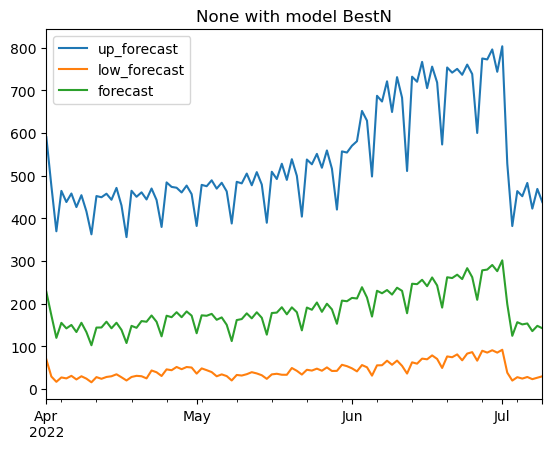

In [238]:
prediction = model.predict()
prediction.plot()
plt.show()
# prediction.plot(
#     model.df_wide_numeric,
#     series=model.df_wide_numeric.columns[2],
#     remove_zeroes=False,
#     start_date="2018-09-26",
# )
# plt.show()


In [167]:
month_names = df['Month']
months = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr':4,
         'may':5,
         'jun':6,
         'jul':7,
         'aug':8,
         'sep':9,
         'oct':10,
         'nov':11,
         'dec':12
        }
month_numeric_list = []
for name in month_names:
    short_name = name.strip()[:3].lower()
    if(short_name in months):
        month_numeric_list.append(months[short_name])
# print(month_numeric_list)

In [31]:
!pip install pyxlsb

In [175]:
df.max()

FY                                 2020-21
Inv_Date               2021-03-31 00:00:00
Prod_Code                       ABCD305002
Material_Desc              ABC Nutrition 6
QtyInMt                               98.0
BasicTurnoverInLacs               23.89338
PerUnitPrice                       23238.0
Customer                          ABCD4402
UOM                                     MT
Customer_Name               not to be used
City                                 Yevla
Taluka                            Zagadiya
District                          Yavatmal
State                        Uttar pradesh
Day                                     31
Month                                  Sep
dtype: object

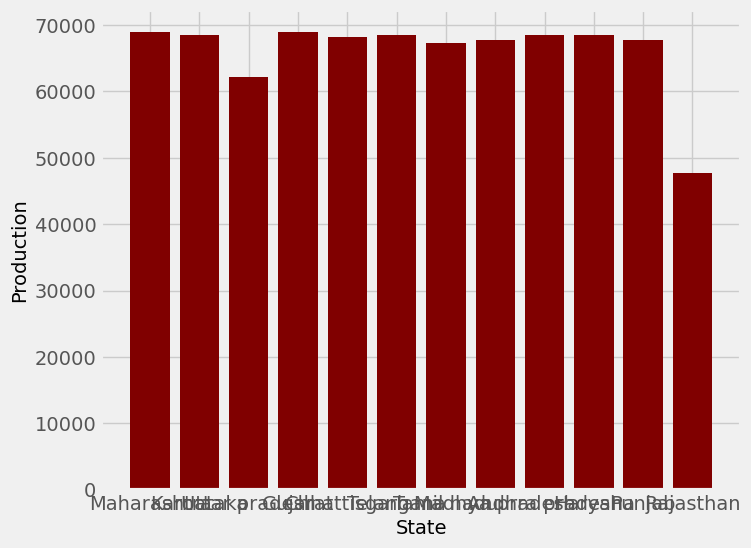

In [176]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['State'],df.index,color='maroon',width = 0.8)
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

In [177]:
df['State'].value_counts()

Maharashtra       52751
Karnataka          7466
Gujarat            3337
Andhra pradesh     2425
Telangana          1103
Madhya pradesh      897
Tamil nadu          280
Uttar pradesh       278
Punjab              160
Haryana              81
Chhattisgarh         72
Rajasthan            39
Name: State, dtype: int64

In [178]:
!pip install pywedge

In [179]:
df.head(3)

,FY,Inv_Date,Prod_Code,Material_Desc,QtyInMt,BasicTurnoverInLacs,PerUnitPrice,Customer,UOM,Customer_Name,City,Taluka,District,State,Day,Month
0,2020-21,2020-04-01,ABCD101001,ABC Nutrition 12,27.0,6.27426,23238.0,ABCD1734,MT,KISAN AGRO SERVICES,Papri,Mohol,Solapur,Maharashtra,1,Apr
1,2020-21,2020-04-01,ABCD103001,ABC Nutrition 21,12.0,2.96004,NaN,ABCD1503,MT,SHRINATH KRUSHI SEVA KENDRA,Talegaon Dhamdhere,Shirur,Pune,Maharashtra,1,Apr
2,2020-21,2020-04-01,ABCD101001,ABC Nutrition 12,10.0,2.32380,NaN,ABCD1503,MT,SHRINATH KRUSHI SEVA KENDRA,Talegaon Dhamdhere,Shirur,Pune,Maharashtra,1,Apr


In [181]:
df.head(5)

,FY,Inv_Date,Prod_Code,Material_Desc,QtyInMt,BasicTurnoverInLacs,PerUnitPrice,Customer,UOM,Customer_Name,City,Taluka,District,State,Day,Month
0,2020-21,2020-04-01,ABCD101001,ABC Nutrition 12,27.0,6.27426,23238.0,ABCD1734,MT,KISAN AGRO SERVICES,Papri,Mohol,Solapur,Maharashtra,1,Apr
1,2020-21,2020-04-01,ABCD103001,ABC Nutrition 21,12.0,2.96004,24667.0,ABCD1503,MT,SHRINATH KRUSHI SEVA KENDRA,Talegaon Dhamdhere,Shirur,Pune,Maharashtra,1,Apr
2,2020-21,2020-04-01,ABCD101001,ABC Nutrition 12,10.0,2.32380,23238.0,ABCD1503,MT,SHRINATH KRUSHI SEVA KENDRA,Talegaon Dhamdhere,Shirur,Pune,Maharashtra,1,Apr
3,2020-21,2020-04-01,ABCD103001,ABC Nutrition 21,13.0,3.20671,24667.0,ABCD1537,MT,CHAITANYA AGREE TRADERS,Oture,Junner,Pune,Maharashtra,1,Apr
4,2020-21,2020-04-01,ABCD103001,ABC Nutrition 21,13.0,3.20671,24667.0,ABCD1419,MT,KAMAL KRISHI SEVA KENDRA,Nandgaon,Nandgaon,Nashik,Maharashtra,1,Apr


In [182]:
import random
import matplotlib.colors as mcolors
color_choice = random.choices(list(mcolors.CSS4_COLORS.values()),k = 25)

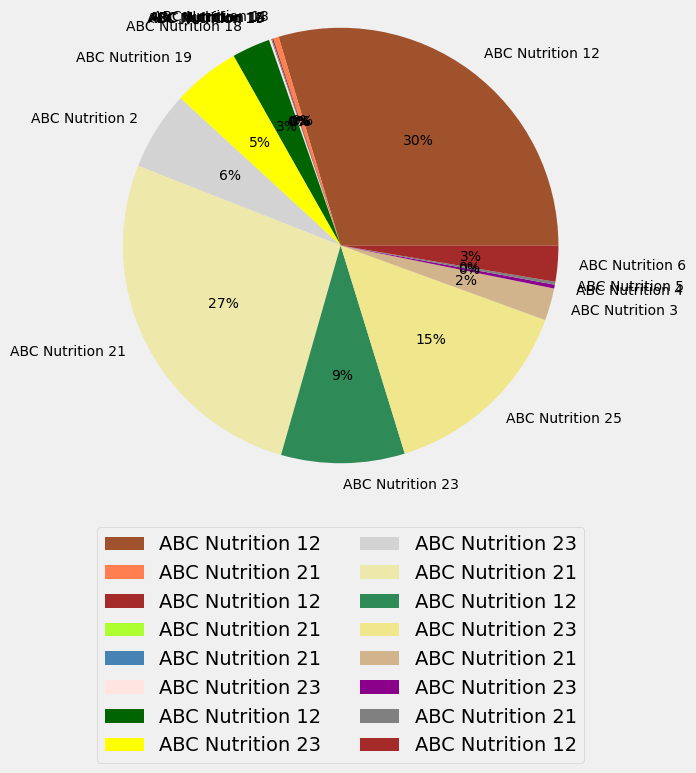

In [183]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
df.groupby('Material_Desc').size().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 10},
                                  colors= color_choice, radius = 1.4)
plt.legend(labels=df.Material_Desc, loc='upper center', 
           bbox_to_anchor=(0.5, -0.2), ncol=2)


In [184]:
a = []
for i in range(1,26):
    a.append(i)
nutrition_feed_type = {'Cattle': a[0:7],'Poultry': a[7:12],'Swine': a[12:15],'Aqua': a[15:20], 'DomesticatedAnimal': a[20:25]}
# for feed in nutrition_feed_type:
#     print("feed: ",feed,end='\n')
#     for i in nutrition_feed_type[feed]:
#         for material in df['Material_Desc']:
#            if(material[-2:].astype(int) == i):
#                df[]
#           b = [material for material in df['Material_Desc'] if (material[-2:].astype(int)==i)]
#           print(b)
# print(df['Material_Desc'].value_counts())
# print(df['FeedType'].value_counts())
b = []
for material in df['Material_Desc']:
     for feed in nutrition_feed_type:
        if(pd.to_numeric(material[-2:]) in nutrition_feed_type[feed]):
           b.append(feed)
           break
df['FeedType'] = b
# pivot_table = pd.pivot_table(df,index=['FeedType','Material_Desc'],values = 'BasicTurnoverInLacs')
variable = df.groupby(['FeedType','Material_Desc']).sum()
sales_per_day = df.groupby(['Month','Day'])['BasicTurnoverInLacs'].sum()
sales_per_day
# variable
# pivot_table

    



Month  Day
Apr    1       22.36483
       2       72.16297
       3       50.73437
       4      123.79442
       5      174.26134
                ...    
Sep    26     945.21130
       27     519.45917
       28     405.12719
       29     531.71082
       30     800.09863
Name: BasicTurnoverInLacs, Length: 365, dtype: float64

<Axes: xlabel='Month'>

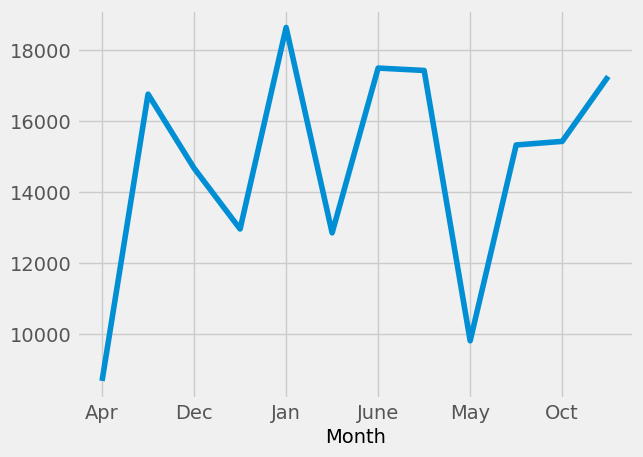

In [185]:
df.groupby(['Month']).sum()['BasicTurnoverInLacs'].plot(kind='line')

<Axes: xlabel='Month'>

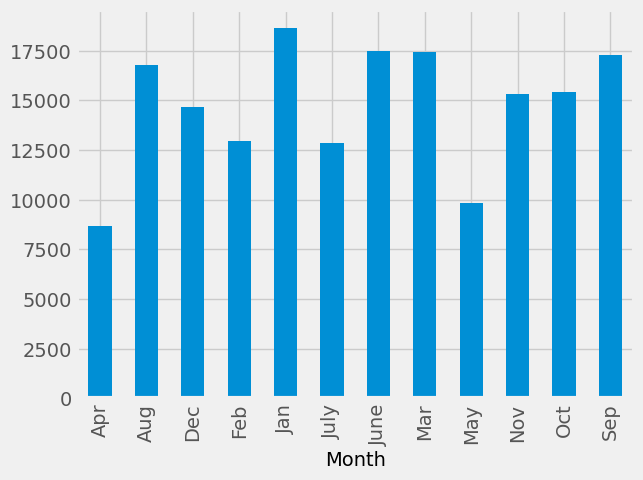

In [186]:
df.groupby(['Month']).sum()['BasicTurnoverInLacs'].plot(kind='bar')

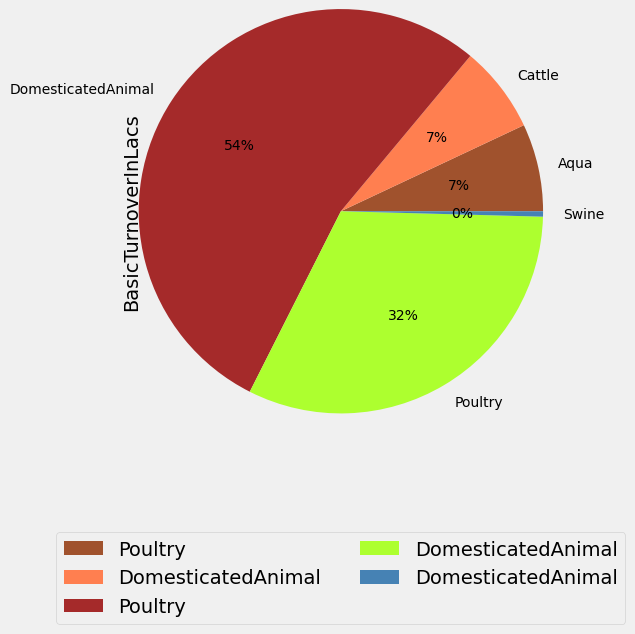

In [187]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
df.groupby(['FeedType']).sum()['BasicTurnoverInLacs'].plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 10},
                                  colors= color_choice, radius = 1.3)
plt.legend(labels=df.FeedType, loc='upper center', 
           bbox_to_anchor=(0.5, -0.3), ncol=2)

In [188]:
# color_pal = sns.color_palette()
df['FeedType'].value_counts()


DomesticatedAnimal    34721
Poultry               20393
Cattle                 7873
Aqua                   5546
Swine                   356
Name: FeedType, dtype: int64

<Axes: xlabel='State'>

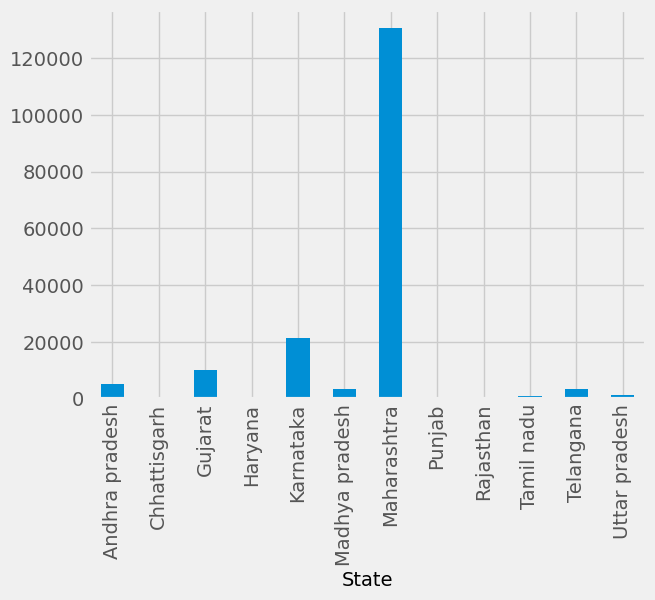

In [189]:
df.groupby(['State']).sum()['BasicTurnoverInLacs'].plot(kind='bar')

<Axes: xlabel='State,District'>

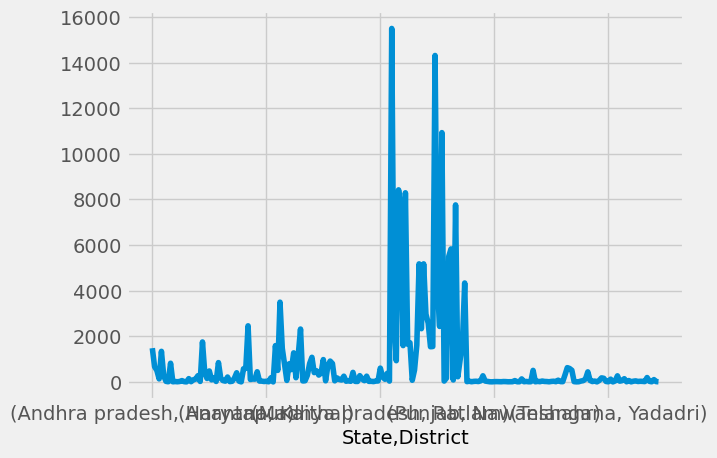

In [190]:
# data_chart = pd.DataFrame(df.groupby(['State','District']).sum())
# data_chart
df.groupby(['State','District']).sum()['BasicTurnoverInLacs'].plot(kind='line')

In [191]:
import pywedge as pw
x = pw.Pywedge_Charts(df,c=None,y="BasicTurnoverInLacs")
charts = x.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [192]:
data = df.groupby(['Day']).sum()['QtyInMt']
data

Day
1     21019.350
2     21174.350
3     19586.450
4     20669.500
5     21097.600
6     25510.550
7     19975.000
8     25853.400
9     25598.600
10    21018.700
11    22126.350
12    25228.700
13    23352.350
14    23545.450
15    24375.250
16    19735.450
17    31419.295
18    27067.800
19    24824.700
20    20122.800
21    22855.100
22    30220.800
23    28009.500
24    26861.500
25    36731.650
26    36002.500
27    35900.850
28    27357.200
29    31070.000
30    40763.210
31    30944.900
Name: QtyInMt, dtype: float64

In [194]:
df.head(5)

,FY,Inv_Date,Prod_Code,Material_Desc,QtyInMt,BasicTurnoverInLacs,PerUnitPrice,Customer,UOM,Customer_Name,City,Taluka,District,State,Day,Month,FeedType
0,2020-21,2020-04-01,ABCD101001,ABC Nutrition 12,27.0,6.27426,23238.0,ABCD1734,MT,KISAN AGRO SERVICES,Papri,Mohol,Solapur,Maharashtra,1,Apr,Poultry
1,2020-21,2020-04-01,ABCD103001,ABC Nutrition 21,12.0,2.96004,24667.0,ABCD1503,MT,SHRINATH KRUSHI SEVA KENDRA,Talegaon Dhamdhere,Shirur,Pune,Maharashtra,1,Apr,DomesticatedAnimal
2,2020-21,2020-04-01,ABCD101001,ABC Nutrition 12,10.0,2.32380,23238.0,ABCD1503,MT,SHRINATH KRUSHI SEVA KENDRA,Talegaon Dhamdhere,Shirur,Pune,Maharashtra,1,Apr,Poultry
3,2020-21,2020-04-01,ABCD103001,ABC Nutrition 21,13.0,3.20671,24667.0,ABCD1537,MT,CHAITANYA AGREE TRADERS,Oture,Junner,Pune,Maharashtra,1,Apr,DomesticatedAnimal
4,2020-21,2020-04-01,ABCD103001,ABC Nutrition 21,13.0,3.20671,24667.0,ABCD1419,MT,KAMAL KRISHI SEVA KENDRA,Nandgaon,Nandgaon,Nashik,Maharashtra,1,Apr,DomesticatedAnimal
